In [9]:
import numpy as np
from scipy import stats

In [10]:
def fit_line(stim_ests):
    #print("input stim_ests: ", np.shape(stim_ests))
    num_neuron = np.shape(stim_ests)[0]
    num_stim = 8
    baseline_start = 0
    baseline_duration = 7
    on_duration = 7
    on_start = 7
    response = stim_ests[:, baseline_start : baseline_start + baseline_duration]
    #print("ests? ", response, on_ests)
    regressor = np.linspace(baseline_start, baseline_duration - 1, baseline_duration)
    #print("input regressor and response shape for line fitting: ", np.shape(regressor), np.shape(response))
    coefficients = np.polyfit(regressor, response.T, deg=1).T
    res = stim_ests[:, baseline_start:baseline_start + baseline_duration] - [(regressor * coefficients[i, 0] + coefficients[i,1]) for i in range(num_neuron)]
    #print("maybe problem with res? ", res, np.shape(res))
    std = np.std(res, axis = 1, ddof=1)
    #print("okmaybe its std:\n", std, np.shape(std))
    total_regressor = np.linspace(0, 20, 21)
    frame_baseline = [(total_regressor * coefficients[i, 0] + coefficients[i,1] + 1.8*std[i]) for i in range(num_neuron)]
    #print("get the shape of frame baseline \n", np.shape(frame_baseline))
    remains = stim_ests - frame_baseline
    avg_remains = np.mean(remains[:, 7:14], axis = 1)
    print("get the shape of frame remains ", np.shape(avg_remains))
    return avg_remains, remains

def baseline_cal(p_t):
    num_stim = 8
    num_trial = 3
    num_neurons = np.shape(p_t)[0]
    res_stim = np.zeros((num_neurons, num_trial, num_stim))
    baseline_remains = np.zeros((num_neurons, 63, num_stim))
    for stim in range(num_stim):
        for trial in range(3):
            new_res, remains = fit_line(p_t[:, trial, stim*21: (stim+1)*21])
            baseline_remains[:, trial*21:(trial+1)*21, stim] = np.copy(remains)
            res_stim[:, trial, stim] = (res_stim[:, trial, stim] * trial + new_res) / (trial+1)
    res_stim = np.where(np.isnan(res_stim), 0, res_stim)
    res_stim[res_stim == np.inf] = 0
    res_avg = np.mean(res_stim, axis = 1)
    #print("the shape for res_avg: ", np.shape(res_avg))
    barcode = np.where(res_avg > 0, 1, 0)
    return res_avg, barcode, baseline_remains


In [11]:
def fit_line_const(stim_ests):
    #print("input stim_ests: ", np.shape(stim_ests))
    num_neuron = np.shape(stim_ests)[0]
    num_stim = 8
    baseline_start = 0
    baseline_duration = 7
    on_duration = 7
    on_start = 7
    coefficient = np.zeros((num_neuron, 3))
    response = stim_ests[:, baseline_start : baseline_start + baseline_duration]
    on_ests = stim_ests[:, on_start : on_start + on_duration]
    on_regressor = np.linspace(on_start, on_start + on_duration - 1, on_duration)
    #print("ests? ", response, on_ests)
    regressor = np.linspace(baseline_start, baseline_duration - 1, baseline_duration)
    #print("input regressor and response shape for line fitting: ", np.shape(regressor), np.shape(response))
    coefficients = np.polyfit(regressor, response.T, deg=0).T
    res = stim_ests[:, baseline_start:baseline_start + baseline_duration] - (coefficients[:,0])[:, np.newaxis]
    #print("maybe problem with res? ", res, np.shape(res))
    std = np.std(res, axis = 1, ddof=1)
    #print("okmaybe its std:\n", std, np.shape(std))
    #logger.info("std shape for line fitting:{0}, {1}".format(np.shape(std), std))
    frame_baseline = coefficients[:,0] + 1.8 * std
    remains = stim_ests - frame_baseline[:, np.newaxis]
    avg_remains = np.mean(remains[:, 7:14], axis = 1)
    #print("get the shape of frame remains ", np.shape(avg_remains))
    return avg_remains, remains


def baseline_const_cal(p_t):
    num_stim = 8
    num_trial = 3
    num_neurons = np.shape(p_t)[0]
    res_stim = np.zeros((num_neurons, num_trial, num_stim))
    baseline_remains = np.zeros((num_neurons, 63, num_stim))
    for stim in range(num_stim):
        for trial in range(3):
            new_res, remains = fit_line_const(p_t[:, trial, stim*21: (stim+1)*21])
            baseline_remains[:, trial*21:(trial+1)*21, stim] = np.copy(remains)
            res_stim[:, trial, stim] = (res_stim[:, trial, stim] * trial + new_res) / (trial+1)
    res_stim = np.where(np.isnan(res_stim), 0, res_stim)
    res_stim[res_stim == np.inf] = 0
    res_avg = np.mean(res_stim, axis = 1)
    #print("the shape for res_avg: ", np.shape(res_stim), np.shape(res_avg))
    barcode = np.where(res_avg > 0, 1, 0)
    return res_avg, barcode, baseline_remains

In [12]:
def baseline_cal_max(p_t):
    num_stim = 8
    num_trial = 3
    num_neurons = np.shape(p_t)[0]
    res_stim = np.zeros((num_neurons, num_trial, num_stim))
    baseline_remains = np.zeros((num_neurons, 63, num_stim))
    for stim in range(num_stim):
        for trial in range(3):
            new_res, remains = fit_line(p_t[:, trial, stim*21: (stim+1)*21])
            baseline_remains[:, trial*21:(trial+1)*21, stim] = np.copy(remains)
            res_stim[:, trial, stim] = (res_stim[:, trial, stim] * trial + new_res) / (trial+1)
    res_stim = np.where(np.isnan(res_stim), 0, res_stim)
    res_stim[res_stim == np.inf] = 0
    res_avg = np.max(res_stim, axis = 1)
    #print("the shape for res_avg: ", np.shape(res_avg))
    barcode = np.where(res_avg > 0, 1, 0)
    return res_avg, barcode, baseline_remains

def baseline_const_cal_max(p_t):
    num_stim = 8
    num_trial = 3
    num_neurons = np.shape(p_t)[0]
    res_stim = np.zeros((num_neurons, num_trial, num_stim))
    baseline_remains = np.zeros((num_neurons, 63, num_stim))
    for stim in range(num_stim):
        for trial in range(3):
            new_res, remains = fit_line_const(p_t[:, trial, stim*21: (stim+1)*21])
            baseline_remains[:, trial*21:(trial+1)*21, stim] = np.copy(remains)
            res_stim[:, trial, stim] = (res_stim[:, trial, stim] * trial + new_res) / (trial+1)
    res_stim = np.where(np.isnan(res_stim), 0, res_stim)
    res_stim[res_stim == np.inf] = 0
    res_avg = np.max(res_stim, axis = 1)
    #print("the shape for res_avg: ", np.shape(res_stim), np.shape(res_avg))
    barcode = np.where(res_avg > 0, 1, 0)
    return res_avg, barcode, baseline_remains


In [13]:
def cal_pvalue(p_t):
    num_neurons = np.shape(p_t)[0]
    t_stats = []
    p_values = []
    ci_baseline_record = np.zeros((num_neurons, 2, 8))
    ci_on_record = np.zeros((num_neurons, 2, 8))
    mean_baseline_record = np.zeros((num_neurons, 8))
    mean_on_record = np.zeros((num_neurons, 8))
    for stim in range(8):
        pt_baseline = p_t[:, :, 21*stim : (21*(stim) + 7)]
        pt_on = p_t[:, :, (21*stim + 7) : (21*stim + 14)]
        #print("??????error?, ", np.shape(pt_baseline), np.shape(pt_on))
        pt_baseline_mean = np.mean(pt_baseline, axis = 2)
        pt_on_mean = np.mean(pt_on, axis = 2)
        #print("??????another errors?, ", np.shape(pt_baseline_mean), np.shape(pt_on_mean))
        mean_baseline_record[:, stim] = np.mean(pt_baseline_mean, axis = 1)
        mean_on_record[:, stim] = np.mean(pt_on_mean, axis = 1)
        for neuron in range(num_neurons):
            ci_baseline = stats.t.interval(alpha=0.95,df=2,loc=np.mean(pt_baseline_mean[neuron]), scale=stats.sem(pt_baseline_mean[neuron]))
            #print("the shape of ci_baseline is ", ci_baseline, np.shape(np.array(ci_baseline)))
            ci_baseline_record[neuron, :, stim] = np.array([ci_baseline[0], ci_baseline[1]])
            ci_on = stats.t.interval(alpha=0.95,df=2,loc=np.mean(pt_on_mean[neuron]), scale=stats.sem(pt_on_mean[neuron]))
            assert((mean_baseline_record[neuron, stim] == np.mean(pt_baseline_mean[neuron])) and (mean_on_record[neuron, stim] == np.mean(pt_on_mean[neuron])))
            #print("the shape of ci_on is ", ci_on, np.shape(np.array(ci_on)))
            ci_on_record[neuron, :, stim] = np.array([ci_on[0], ci_on[1]])
        rvs = pt_on_mean - pt_baseline_mean
        #print("the shape of rvs: ", np.shape(rvs))
        stat_res = stats.ttest_1samp(rvs, popmean=0, axis = 1)
        t_stat = np.array(stat_res[0])
        p_value = np.array(stat_res[1])
        invalid_index = np.where(mean_on_record[:, stim] < mean_baseline_record[:, stim])
        p_value[invalid_index] = -1
        #print(np.shape(p_value))
        t_stats.append(t_stat)
        p_values.append(p_value)
    t_stats = np.array(t_stats).T
    p_values = np.array(p_values).T
    return t_stats, p_values, ci_baseline_record, ci_on_record, mean_baseline_record, mean_on_record


def cal_pvalue_max(p_t):
    num_neurons = np.shape(p_t)[0]
    t_stats = []
    p_values = []
    ci_baseline_record = np.zeros((num_neurons, 2, 8))
    ci_on_record = np.zeros((num_neurons, 2, 8))
    max_baseline_record = np.zeros((num_neurons, 8))
    max_on_record = np.zeros((num_neurons, 8))
    for stim in range(8):
        pt_baseline = p_t[:, :, 21*stim : (21*(stim) + 7)]
        pt_on = p_t[:, :, (21*stim + 7) : (21*stim + 14)]
        #print("??????error?, ", np.shape(pt_baseline), np.shape(pt_on))
        pt_baseline_max = np.mean(pt_baseline, axis = 2)
        pt_on_max = np.max(pt_on, axis = 2)
        #print("??????another errors?, ", np.shape(pt_baseline_mean), np.shape(pt_on_mean))
        max_baseline_record[:, stim] = np.mean(pt_baseline_max, axis = 1)
        max_on_record[:, stim] = np.mean(pt_on_max, axis = 1)
        for neuron in range(num_neurons):
            ci_baseline = stats.t.interval(alpha=0.95,df=2,loc=np.mean(pt_baseline_max[neuron]), scale=stats.sem(pt_baseline_max[neuron]))
            #print("the shape of ci_baseline is ", ci_baseline, np.shape(np.array(ci_baseline)))
            ci_baseline_record[neuron, :, stim] = np.array([ci_baseline[0], ci_baseline[1]])
            ci_on = stats.t.interval(alpha=0.95,df=2,loc=np.mean(pt_on_max[neuron]), scale=stats.sem(pt_on_max[neuron]))
            assert((max_baseline_record[neuron, stim] == np.mean(pt_baseline_max[neuron])) and (max_on_record[neuron, stim] == np.mean(pt_on_max[neuron])))
            #print("the shape of ci_on is ", ci_on, np.shape(np.array(ci_on)))
            ci_on_record[neuron, :, stim] = np.array([ci_on[0], ci_on[1]])
        rvs = pt_on_max - pt_baseline_max
        #print("the shape of rvs: ", np.shape(rvs))
        stat_res = stats.ttest_1samp(rvs, popmean=0, axis = 1)
        t_stat = np.array(stat_res[0])
        p_value = np.array(stat_res[1])
        invalid_index = np.where(max_on_record[:, stim] < max_baseline_record[:, stim])
        p_value[invalid_index] = -1
        #print(np.shape(p_value))
        t_stats.append(t_stat)
        p_values.append(p_value)
    t_stats = np.array(t_stats).T
    p_values = np.array(p_values).T
    return t_stats, p_values, ci_baseline_record, ci_on_record, max_baseline_record, max_on_record

In [14]:
def correlate_cal(pt_all):
    num_neurons = np.shape(pt_all)[0]
    slope_record = np.zeros((num_neurons, 3, 8))
    intercept_record = np.zeros((num_neurons, 3, 8))
    for trial in range(3):
        for stim in range(8):
            pt = pt_all[:, trial, 21*stim : 21*(stim + 1)]
            pt_base = pt[:, :7]
            pt_on = pt[:, 7:14]
            regressor = np.linspace(7, 13, 7)
            #print("input regressor and response shape for line fitting: ", np.shape(regressor), np.shape(response))
            coefficients = np.polyfit(regressor, pt_on.T, deg=1).T
            #print("??????? coefficients shape", np.shape(coefficients))
            slope = coefficients[:,0]
            intercept = coefficients[:,1]
            slope_record[:, trial, stim] = np.copy(slope)
            intercept_record[:, trial, stim] = np.copy(intercept)
    return slope_record, intercept_record


In [30]:
def cal_correlate_pvalue(slope):
    num_neurons = np.shape(slope)[0]
    p_record = np.zeros((num_neurons, 8))
    t_record = np.zeros((num_neurons, 8))
    ci_record = np.zeros((num_neurons, 2, 8))
    slope_mean_record = np.zeros((num_neurons, 8))
    for stim in range(8):
        rvs = slope[:, :, stim]
        res = stats.ttest_1samp(rvs, popmean=0, axis = 1)
        for neuron in range(num_neurons):
            ci = stats.t.interval(alpha=0.95,df=2,loc=np.mean(rvs[neuron]), scale=stats.sem(rvs[neuron]))
            #print("the shape of ci is ", ci, ci[0], np.shape(np.array(ci)))
            ci_record[neuron, :, stim] = np.array([ci[0], ci[1]])
        t_value = np.copy(res[0])
        p_value = np.copy(res[1])
        invalid_index = np.where(np.mean(rvs, axis = 1) < 0)
        p_value[invalid_index] = -1
        p_record[:, stim] = p_value
        t_record[:, stim] = t_value
        slope_mean_record[:, stim] = np.mean(rvs, axis = 1)
    return t_record, p_record, ci_record, slope_mean_record
    

In [16]:
plane_index = 1

In [24]:
all_neuron = np.load(f'data/p{plane_index}/p{plane_index}_all_neuron_stimwise_preprocessed.npy')

In [25]:
all_neuron = None
for i in range(4):
    neuron = np.load(f'data/p{i}/p{i}_all_neuron_stimwise_preprocessed.npy')
    if all_neuron is None:
        all_neuron = neuron#[75:105]
    else:
        all_neuron = np.concatenate((all_neuron, neuron), axis = 0)
        print(np.shape(all_neuron))

(1867, 3, 336)
(2796, 3, 336)
(3789, 3, 336)


In [26]:
print(np.max(all_neuron), np.min(all_neuron))

145.96235163733715 -0.6867243005955547


In [27]:
np.shape(all_neuron)
#np.shape(select_pt)

(3789, 3, 336)

In [28]:
print(np.where(all_neuron > 10))
all_neuron[3183, 0, 11] *= 0.01
print(all_neuron[3183, 0, 10:13])

(array([3183]), array([0]), array([11]))
[-0.02185295  1.45962352  0.17126295]


In [31]:
fit_line_res_avg, fit_line_barcode, fit_line_remains = baseline_cal(all_neuron)
fit_avg_res_avg, fit_avg_barcode, fit_avg_remains = baseline_const_cal(all_neuron)

trial_avg_t, trial_avg_p, ci_baseline_record, ci_on_record, mean_baseline_record, mean_on_record = cal_pvalue(all_neuron)

slope_record, intercept_record = correlate_cal(all_neuron)
correlate_t, correlate_p, correlate_ci, correlate_mean = cal_correlate_pvalue(slope_record)

fit_line_res_max_avg, fit_line_max_barcode, fit_line_max_remains = baseline_cal_max(all_neuron)
fit_avg_res_max_avg, fit_avg_max_barcode, fit_avg_max_remains = baseline_const_cal_max(all_neuron)
trial_avg_max_t, trial_avg_max_p, ci_baseline_max_record, ci_on_max_record, mean_baseline_max_record, mean_on_max_record = cal_pvalue_max(all_neuron)

get the shape of frame remains  (3789,)
get the shape of frame remains  (3789,)
get the shape of frame remains  (3789,)
get the shape of frame remains  (3789,)
get the shape of frame remains  (3789,)
get the shape of frame remains  (3789,)
get the shape of frame remains  (3789,)
get the shape of frame remains  (3789,)
get the shape of frame remains  (3789,)
get the shape of frame remains  (3789,)
get the shape of frame remains  (3789,)
get the shape of frame remains  (3789,)
get the shape of frame remains  (3789,)
get the shape of frame remains  (3789,)
get the shape of frame remains  (3789,)
get the shape of frame remains  (3789,)
get the shape of frame remains  (3789,)
get the shape of frame remains  (3789,)
get the shape of frame remains  (3789,)
get the shape of frame remains  (3789,)
get the shape of frame remains  (3789,)
get the shape of frame remains  (3789,)
get the shape of frame remains  (3789,)
get the shape of frame remains  (3789,)
get the shape of frame remains  (3789,)


In [32]:
print(np.shape(slope_record))
print(np.shape(trial_avg_p))
print(np.shape(correlate_p))
print(np.shape(fit_line_barcode))
print(np.shape(fit_avg_barcode))
print(np.shape(trial_avg_max_p))
print(np.shape(fit_line_max_barcode))
print(np.shape(fit_avg_max_barcode))
print(np.shape(correlate_t))
print(np.shape(trial_avg_t))

(3789, 3, 8)
(3789, 8)
(3789, 8)
(3789, 8)
(3789, 8)
(3789, 8)
(3789, 8)
(3789, 8)
(3789, 8)
(3789, 8)


In [39]:
num_neurons = np.shape(all_neuron)[0]
max_barcode = np.zeros((num_neurons, 8))
mean_barcode_both = np.zeros((num_neurons, 8))
mean_barcode_slope = np.zeros((num_neurons, 8))
mean_barcode_avg = np.zeros((num_neurons, 8))
both_mean_on = np.zeros(8)
both_mean = {}
slope_mean_on = np.zeros(8)
slope_mean = {}
avg_mean_on = np.zeros(8)
avg_mean = {}
both_max_on = np.zeros(8)
slope_max_on = np.zeros(8)
avg_max_on = np.zeros(8)
three_test_yes_barcode = np.zeros((num_neurons, 8))
three_test_yes = np.zeros(8)

for i in range(num_neurons):
    for j in range(8):
        # Save all the index that are at least three tests said yes
        if ((correlate_p[i, j] > 0) and (correlate_p[i, j] < 0.1)) and ((trial_avg_p[i, j] > 0) and (trial_avg_p[i, j] < 0.1)) and fit_line_max_barcode[i,j] == 1:
            three_test_yes_barcode[i, j] = 1
            three_test_yes[j] += 1
        elif ((correlate_p[i, j] > 0) and (correlate_p[i, j] < 0.1)) and (trial_avg_p[i, j] > 0) and (trial_avg_p[i, j] < 0.1) and fit_avg_max_barcode[i,j] == 1:
            three_test_yes_barcode[i, j] = 1
            three_test_yes[j] += 1 
        elif ((correlate_p[i, j] > 0) and (correlate_p[i, j] < 0.1)) and (fit_line_max_barcode[i,j] == 1) and (fit_avg_max_barcode[i,j] == 1):
            three_test_yes_barcode[i, j] = 1
            three_test_yes[j] += 1 
        elif ((trial_avg_p[i, j] > 0) and (trial_avg_p[i, j] < 0.1)) and fit_line_max_barcode[i,j] == 1 and fit_avg_max_barcode[i,j] == 1:
            three_test_yes_barcode[i, j] = 1
            three_test_yes[j] += 1 
        elif ((correlate_p[i, j] > 0) and (correlate_p[i, j] < 0.1)) and ((trial_avg_p[i, j] > 0) and (trial_avg_p[i, j] < 0.1)):
            mean_barcode_both[i, j] = 1
            both_mean_on[j] += 1
            if both_mean_on[j] == 1:
                both_mean[j] = []
                both_mean[j].append(i)
            else:
                both_mean[j].append(i)
        elif ((correlate_p[i, j] > 0) and (correlate_p[i, j] < 0.1)):
            mean_barcode_slope[i, j] = 1
            slope_mean_on[j] += 1
            if slope_mean_on[j] == 1:
                slope_mean[j] = []
                slope_mean[j].append(i)
            else:
                slope_mean[j].append(i)
        elif ((trial_avg_p[i, j] > 0) and (trial_avg_p[i, j] < 0.1)):
            mean_barcode_avg[i, j] = 1
            avg_mean_on[j] += 1
            if avg_mean_on[j] == 1:
                avg_mean[j] = []
                avg_mean[j].append(i)
            else:
                avg_mean[j].append(i)
        # elif (correlate_p[i, j] > 0) and (correlate_p[i, j] < 0.1) and (trial_avg_max_p[i, j] > 0) and (trial_avg_max_p[i, j] < 0.1):
        #     max_barcode[i, j] = 1
        #     both_max_on[j] += 1
        # elif (correlate_p[i, j] > 0) and (correlate_p[i, j] < 0.1):
        #     max_barcode[i, j] = 2
        #     slope_max_on[j] += 1
        # elif (trial_avg_max_p[i, j] > 0) and (trial_avg_max_p[i, j] < 0.1):
        #     max_barcode[i, j] = 3
        #     avg_max_on[j] += 1 
               
print(three_test_yes)
print(both_mean_on)
print(slope_mean_on)
print(avg_mean_on)
# print(both_mean_on, slope_mean_on, avg_mean_on)  
# print()
# print(both_max_on, slope_max_on, avg_max_on)       

[260. 316. 514. 238. 199. 495. 254. 149.]
[ 5. 17.  9. 14. 13. 18.  7.  2.]
[197. 244. 281. 184. 198. 282. 209. 205.]
[133. 175. 107. 150. 139. 113. 134. 133.]


In [55]:
# Since df == 2, the t statistics for p should be divied by 2 to get the real p (no alternative option, ??)
# p =  0.01 will be 6.965, 
# p = 0.025 will be 4.303, 
# p = 0.05 will be 2.92, 
# p = 0.1, t-statistics will be 1.886
slope_index = np.where(correlate_p > 0.01)
slope_t = correlate_t[slope_index]
print(np.max(slope_t))

9.92073708268986


In [40]:
slope_index = np.where(mean_barcode_slope == 1)
avg_index = np.where(mean_barcode_avg == 1)
slope_t = correlate_t[slope_index]
slope_p = correlate_p[slope_index]
avg_p = trial_avg_p[slope_index]
print(slope_t[:10])
print(slope_p[:10])
print(avg_p[:10])

[3.69143555 3.59358991 2.99633459 3.71973591 7.1112871  3.62458512
 3.37894777 8.27207478 8.74822069 4.47264572]
[0.06618316 0.06946423 0.09566721 0.065276   0.01920656 0.06839987
 0.07753668 0.01430132 0.01281589 0.04652753]
[ 0.44710977  0.61289645 -1.         -1.         -1.          0.23738623
  0.6570431   0.31048826 -1.         -1.        ]


In [ ]:
both_mean_list = np.unique(np.concatenate((np.array(both_mean[0]), np.array(both_mean[1]),np.array(both_mean[2]),np.array(both_mean[3]), np.array(both_mean[4]), np.array(both_mean[5]), np.array(both_mean[6]), np.array(both_mean[7]))))
slope_mean_list = np.unique(np.concatenate((np.array(slope_mean[0]), np.array(slope_mean[1]),np.array(slope_mean[2]),np.array(slope_mean[3]), np.array(slope_mean[4]), np.array(slope_mean[5]), np.array(slope_mean[6]), np.array(slope_mean[7]))))
avg_mean_list = np.unique(np.concatenate((np.array(avg_mean[0]), np.array(avg_mean[1]),np.array(avg_mean[2]),np.array(avg_mean[3]), np.array(avg_mean[4]), np.array(avg_mean[5]), np.array(avg_mean[6]), np.array(avg_mean[7]))))
print(both_mean_list)
print(slope_mean_list)
print(avg_mean_list)

In [ ]:
print(np.shape(slope_mean_list))

In [ ]:
max_index = []
second = []
for i in range(3789):
    for j in range(8):
        if (correlate_p[i, j] > 0) and (correlate_p[i, j] < 0.1) and (trial_avg_p[i, j] > 0) and (trial_avg_p[i, j] < 0.1):
            second.append(i)
        elif (trial_avg_max_p[i, j] < 0.1 and trial_avg_max_p[i, j] > 0) and (correlate_p[i, j] < 0.1 and correlate_p[i, j] > 0):
            max_index.append(i)
            
print(len(second))
second = np.unique(np.array(second))
max_index = np.unique(np.array(max_index))
print(len(max_index), len(second))

In [ ]:
first_stim_index = np.where(three_test_yes_barcode[:, 0] == 1)
print(first_stim_index)

In [ ]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Define the sizes of the sets
set1_size = both_mean_on[0]
set2_size = slope_mean_on[0]
intersection_size = avg_mean_on[0]

# Create a Venn diagram
venn = venn2(subsets=(set1_size, set2_size, intersection_size), set_labels=('Set 1', 'Set 2'))

# Add set size labels
venn.get_label_by_id('10').set_text(str(set1_size))
venn.get_label_by_id('01').set_text(str(set2_size))
venn.get_label_by_id('11').set_text(str(intersection_size))

# Set the title
plt.title("Venn Diagram with Set Sizes")

# Display the plot
plt.show()


2
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
3


/home/sp645/miniconda3/envs/improv/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
5


/home/sp645/miniconda3/envs/improv/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
6


/home/sp645/miniconda3/envs/improv/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
8


/home/sp645/miniconda3/envs/improv/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
10


/home/sp645/miniconda3/envs/improv/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
10


/home/sp645/miniconda3/envs/improv/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
11


/home/sp645/miniconda3/envs/improv/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
11


/home/sp645/miniconda3/envs/improv/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
13


/home/sp645/miniconda3/envs/improv/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)
(3789, 3, 336)
(3, 21)


/home/sp645/miniconda3/envs/improv/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


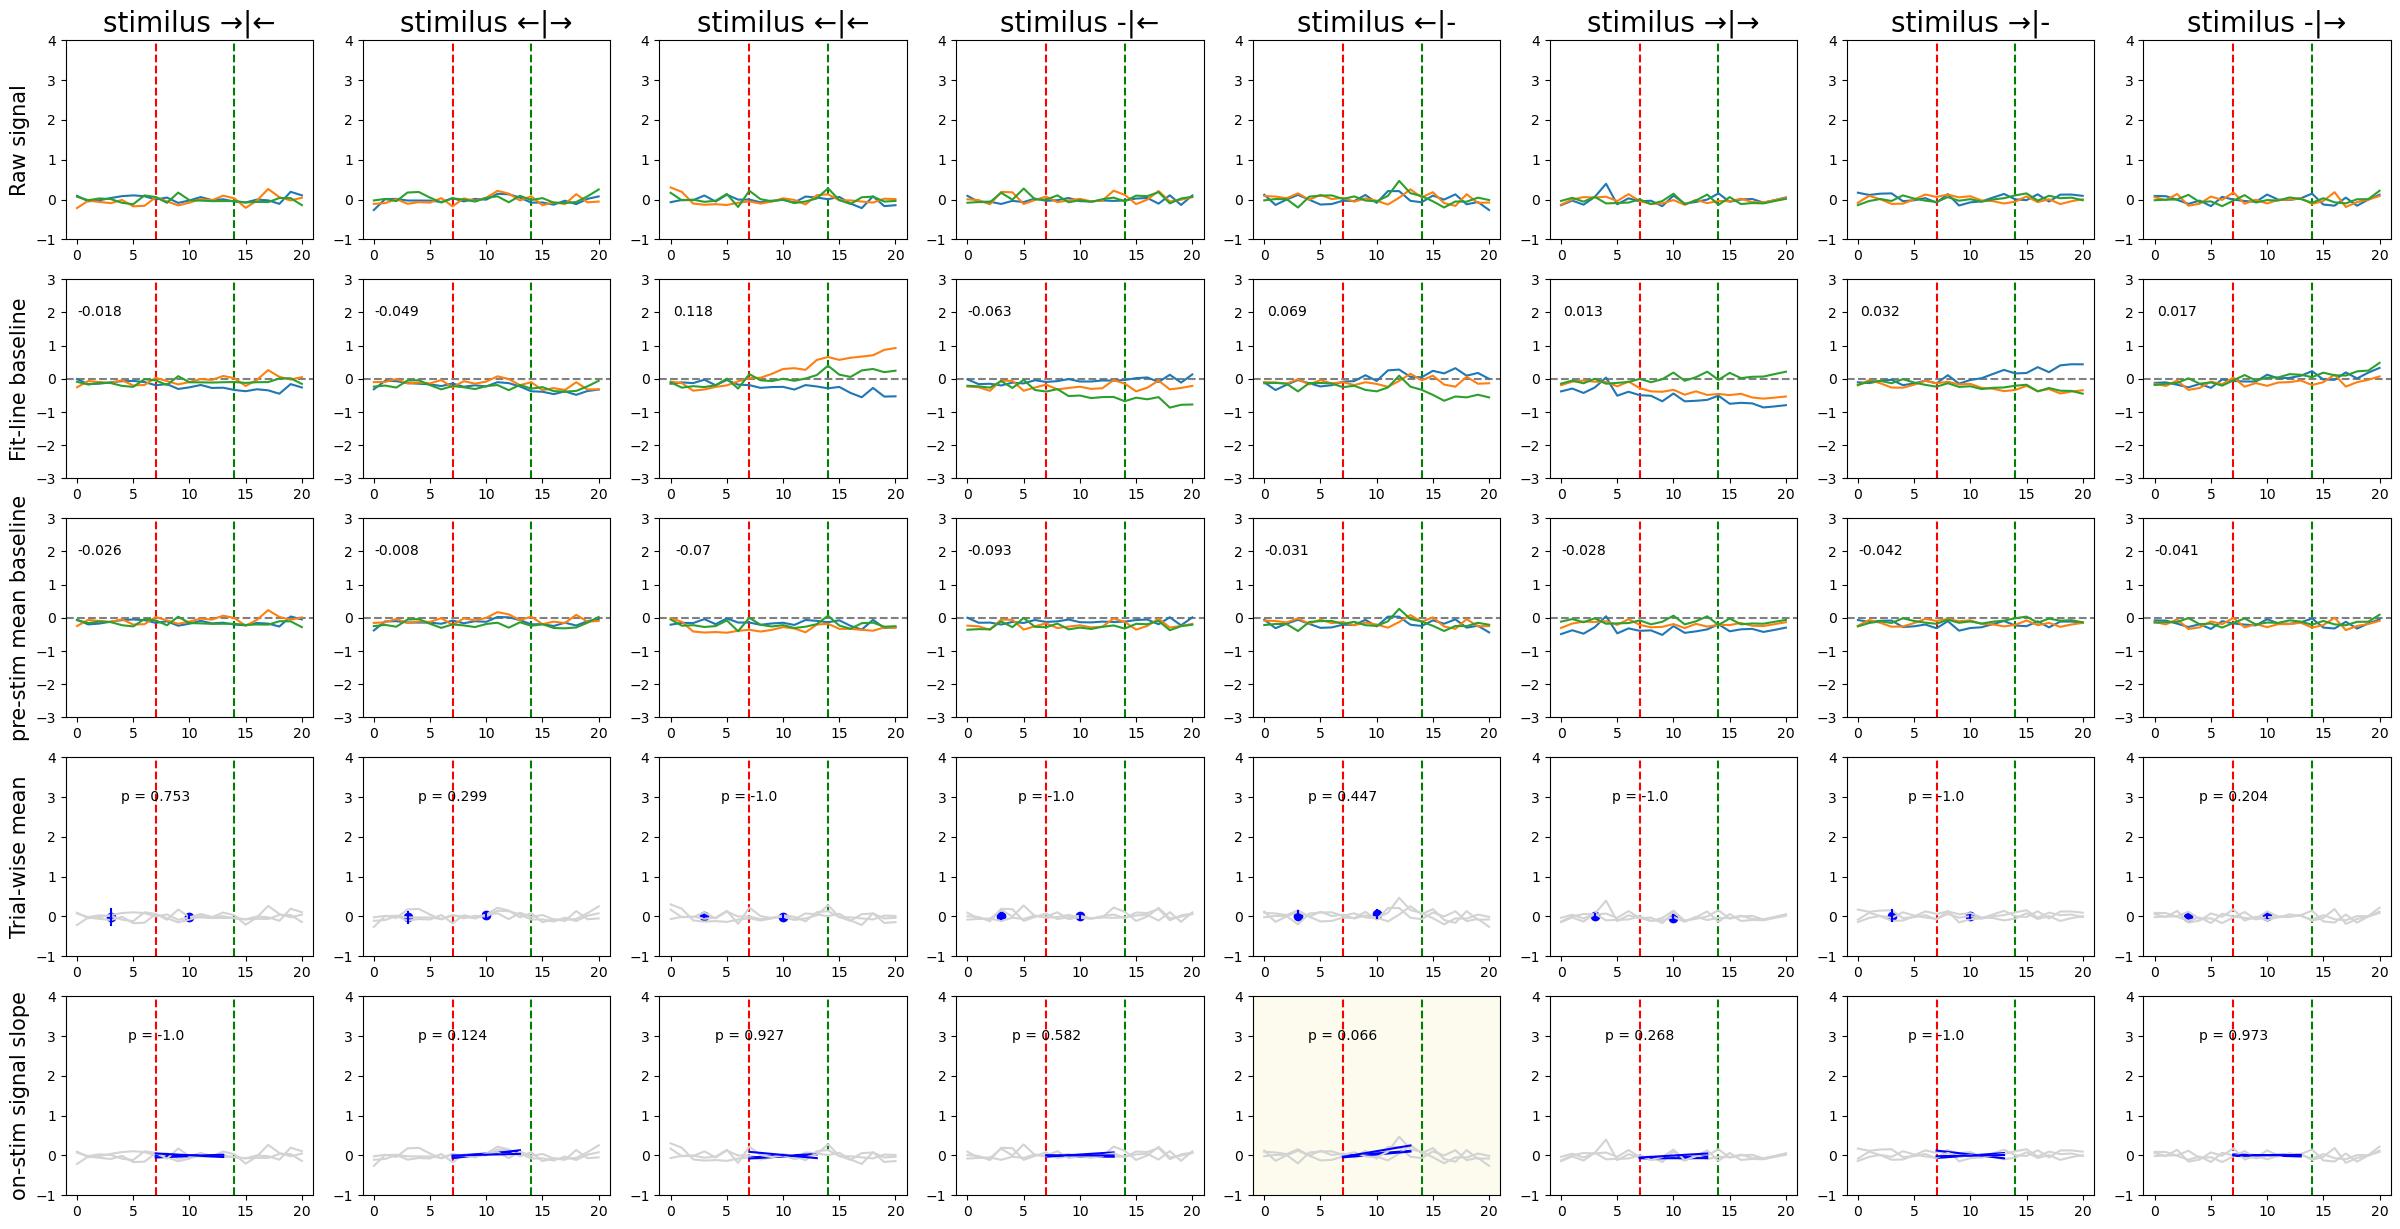

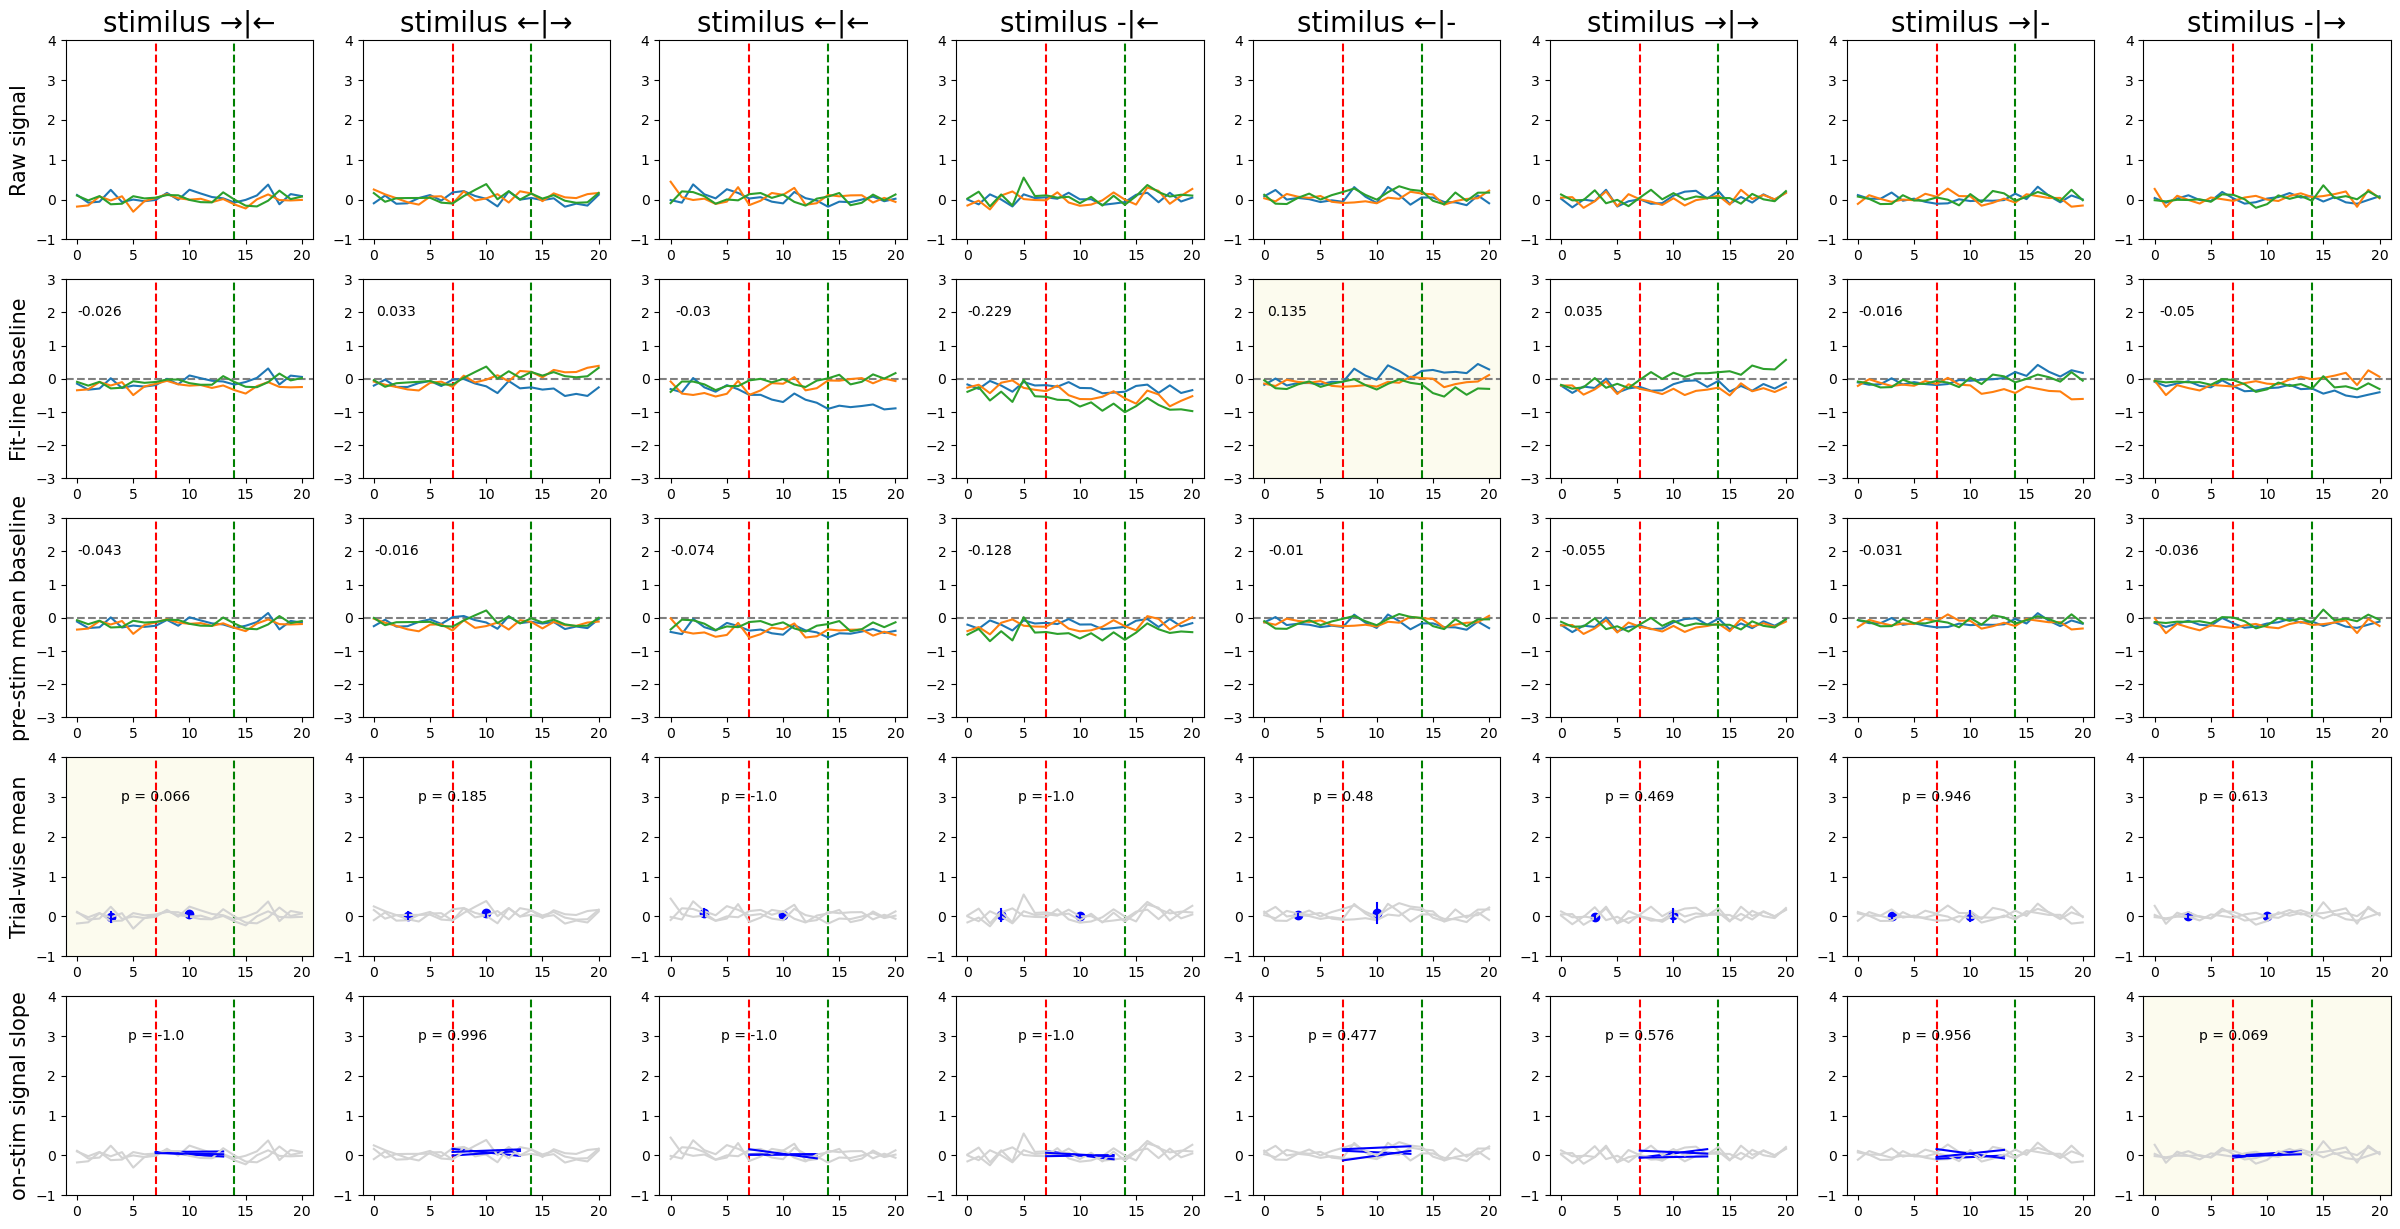

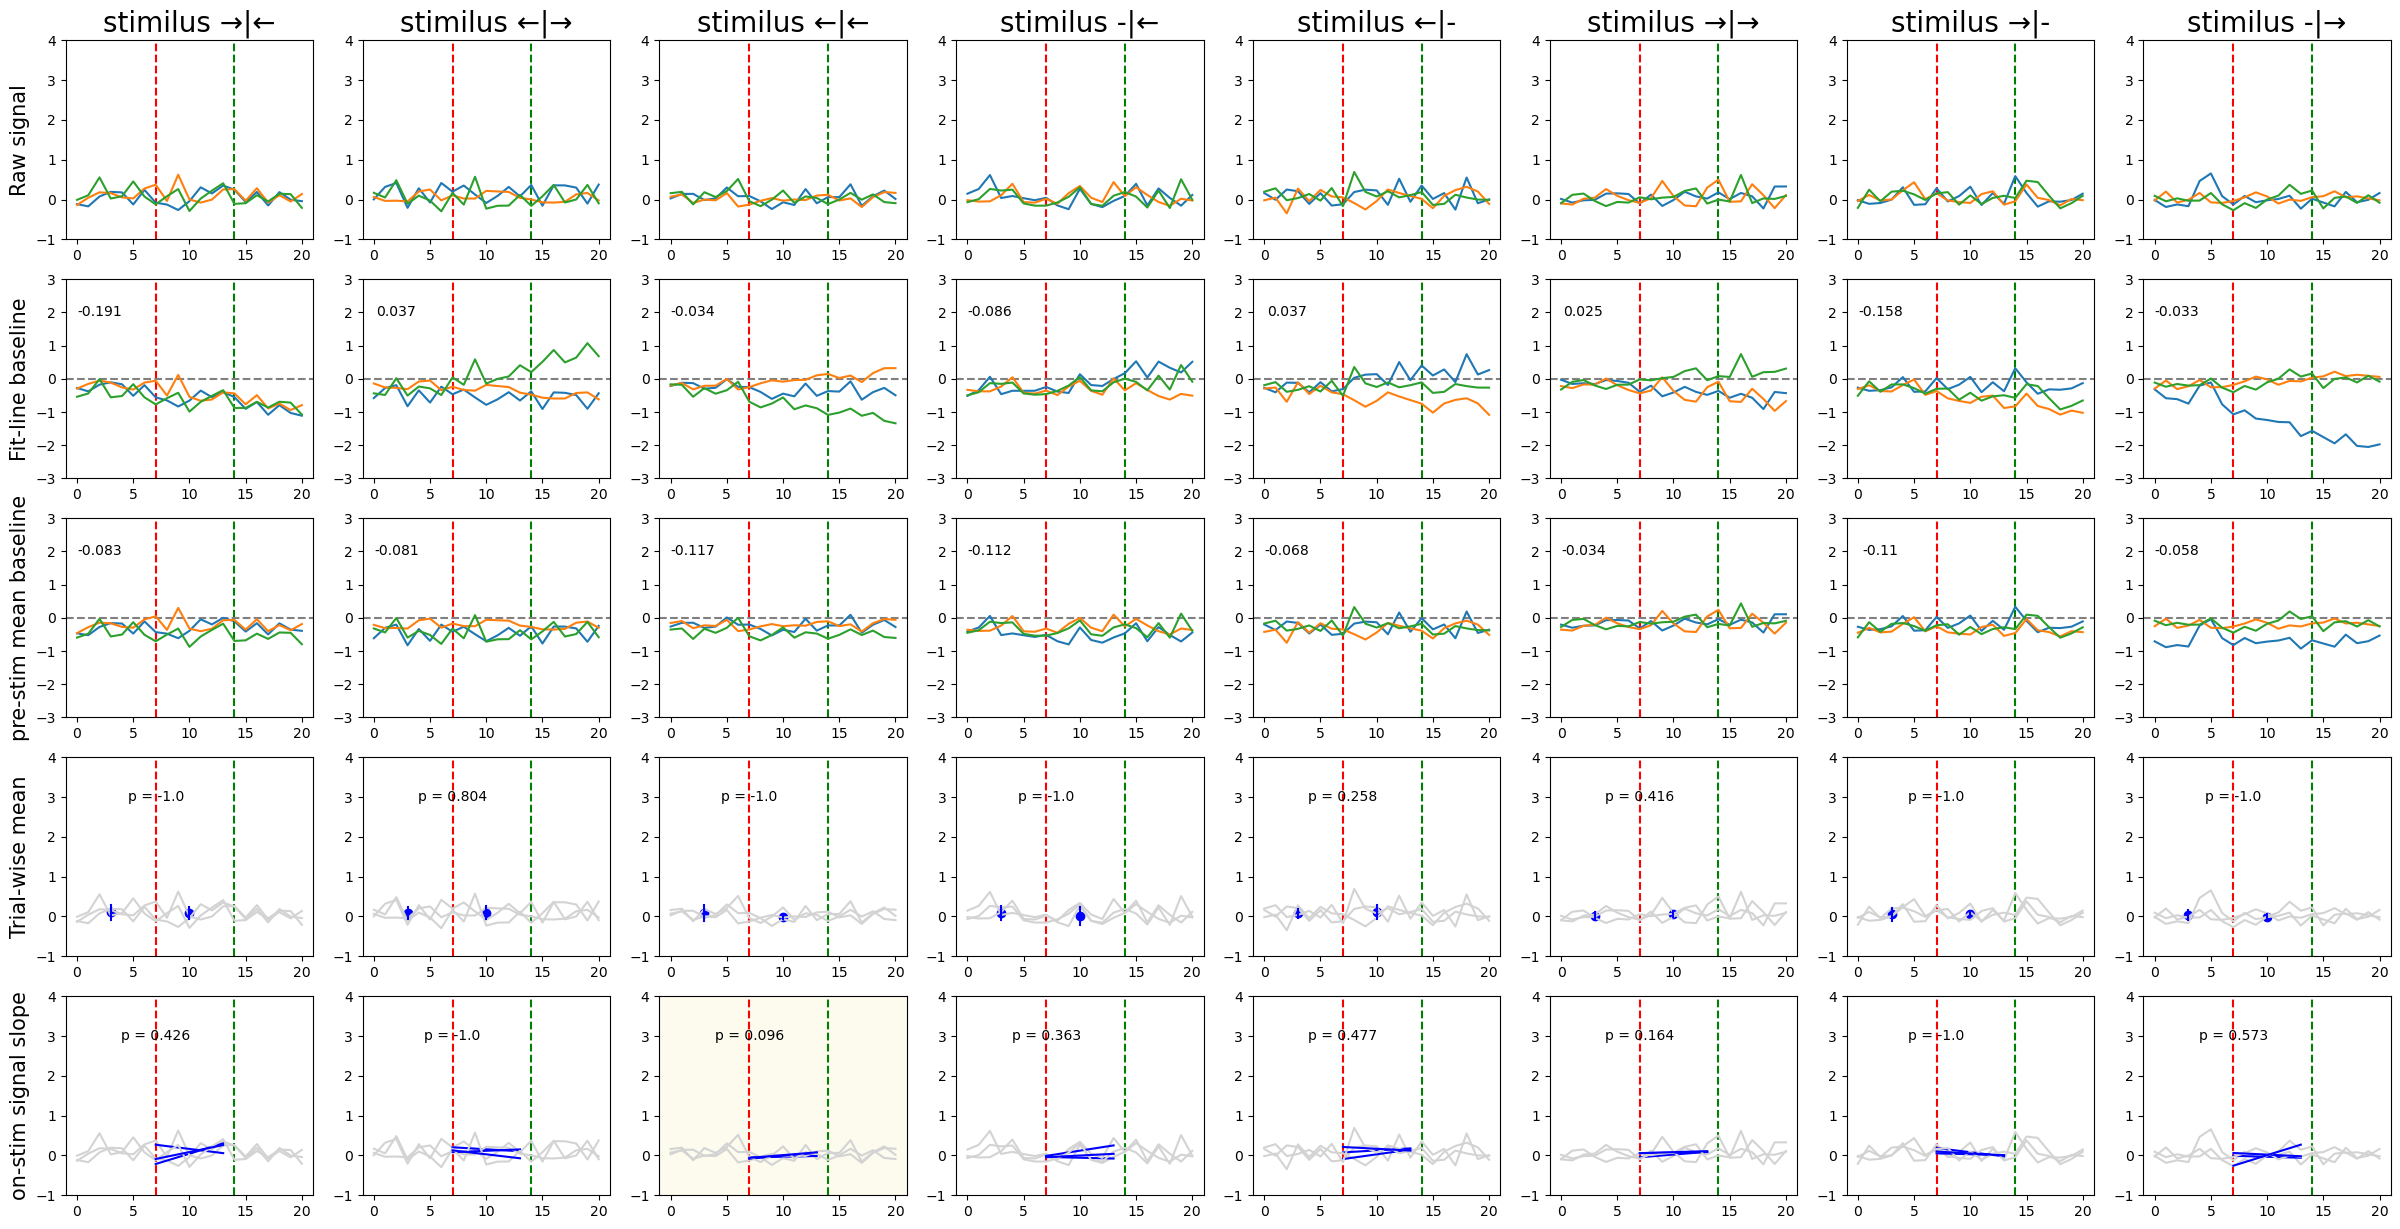

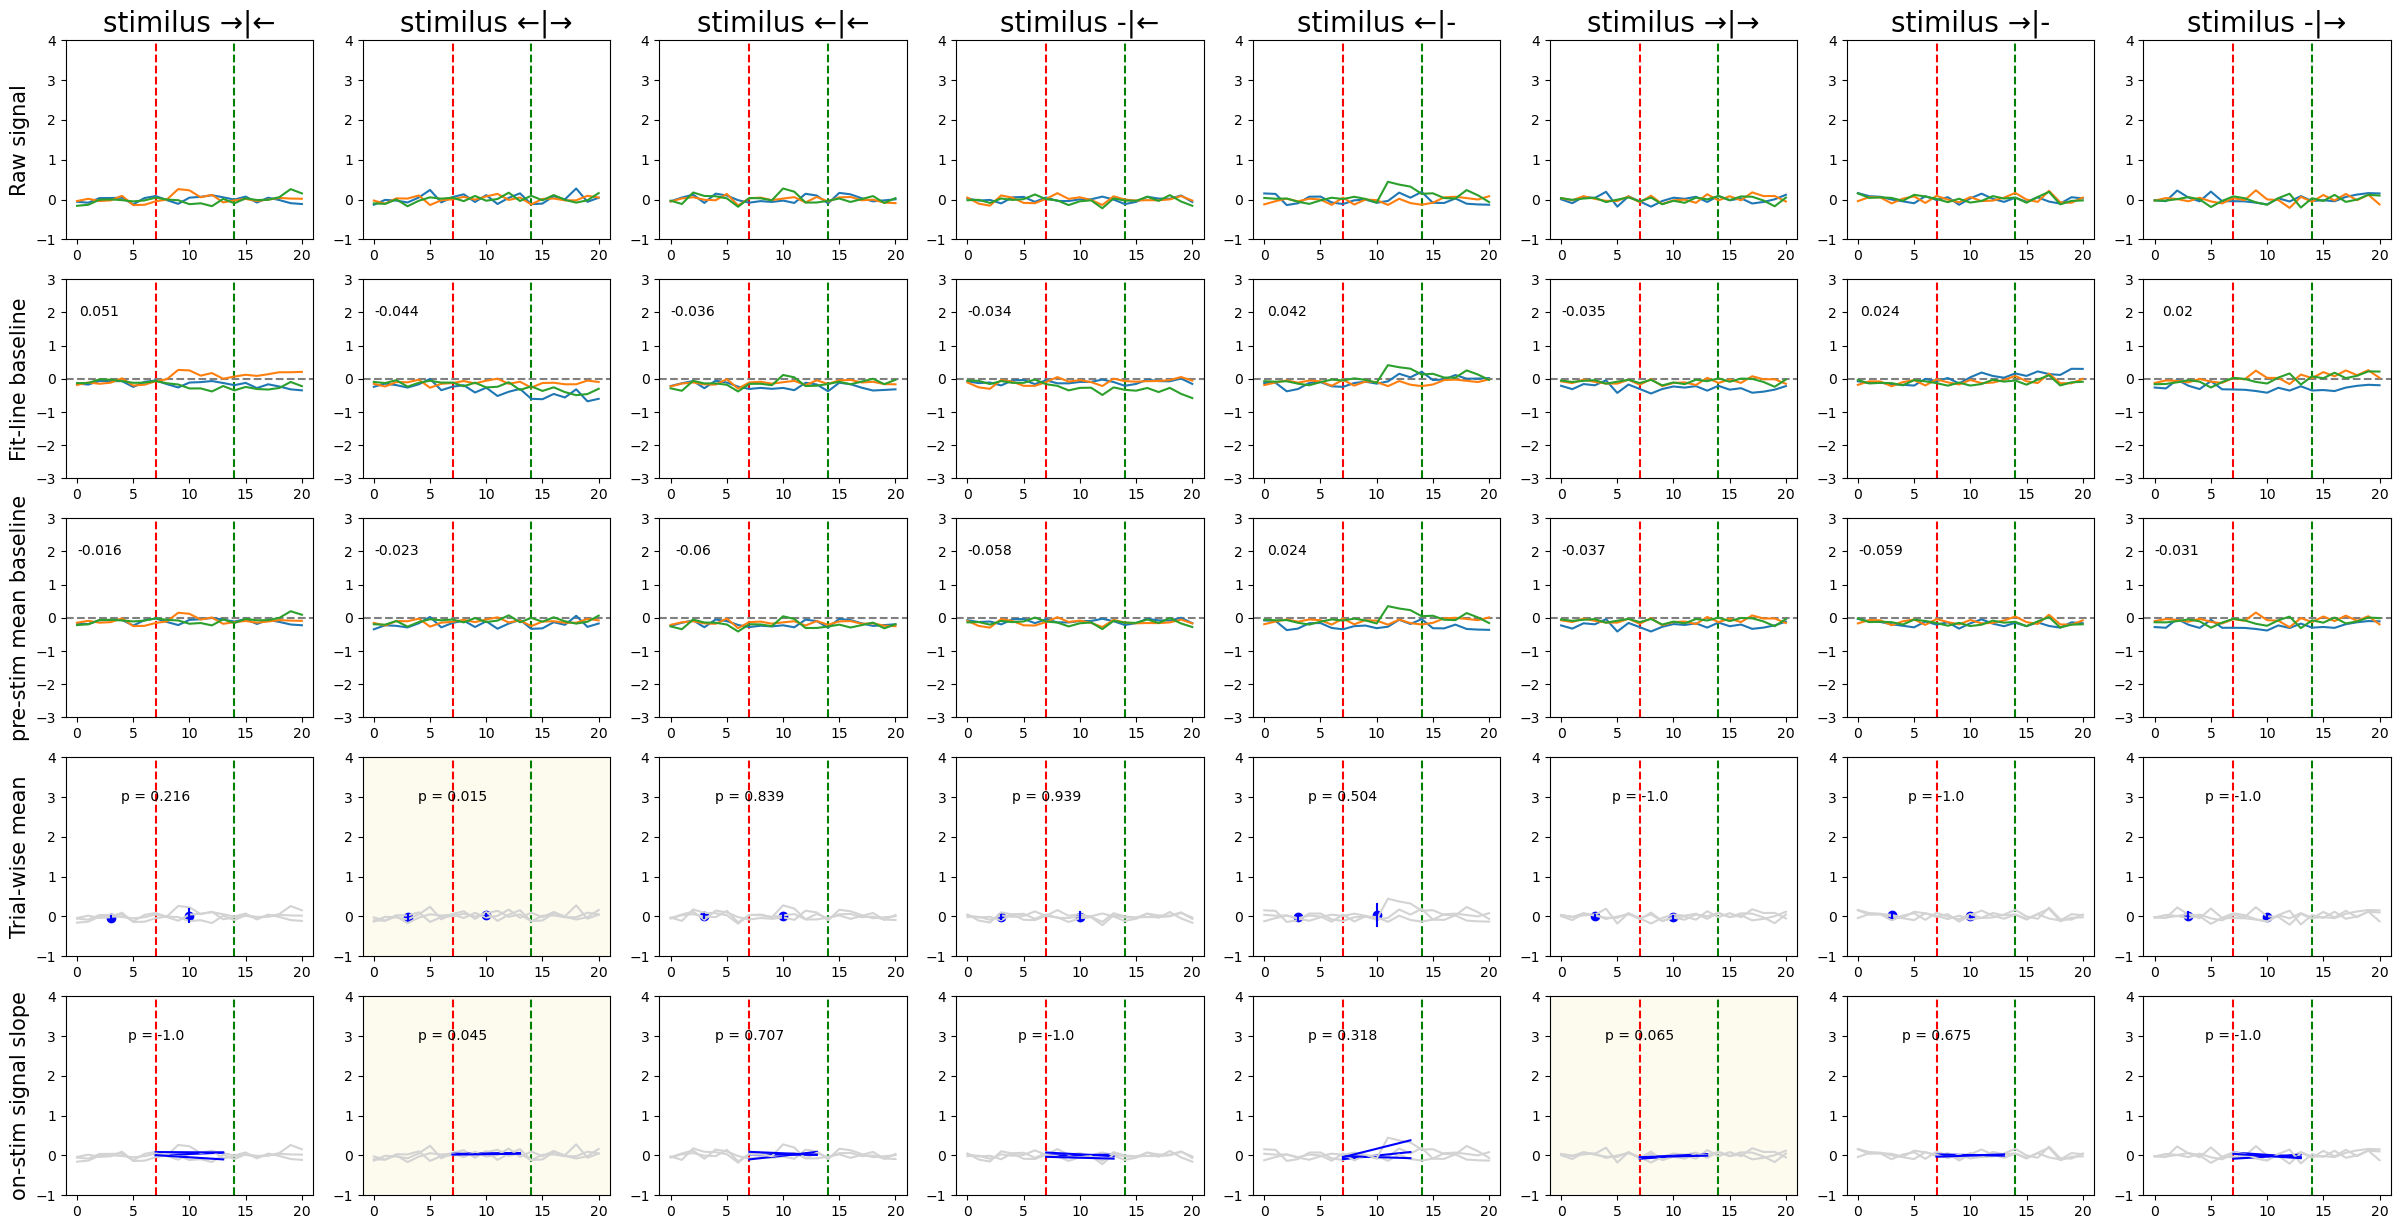

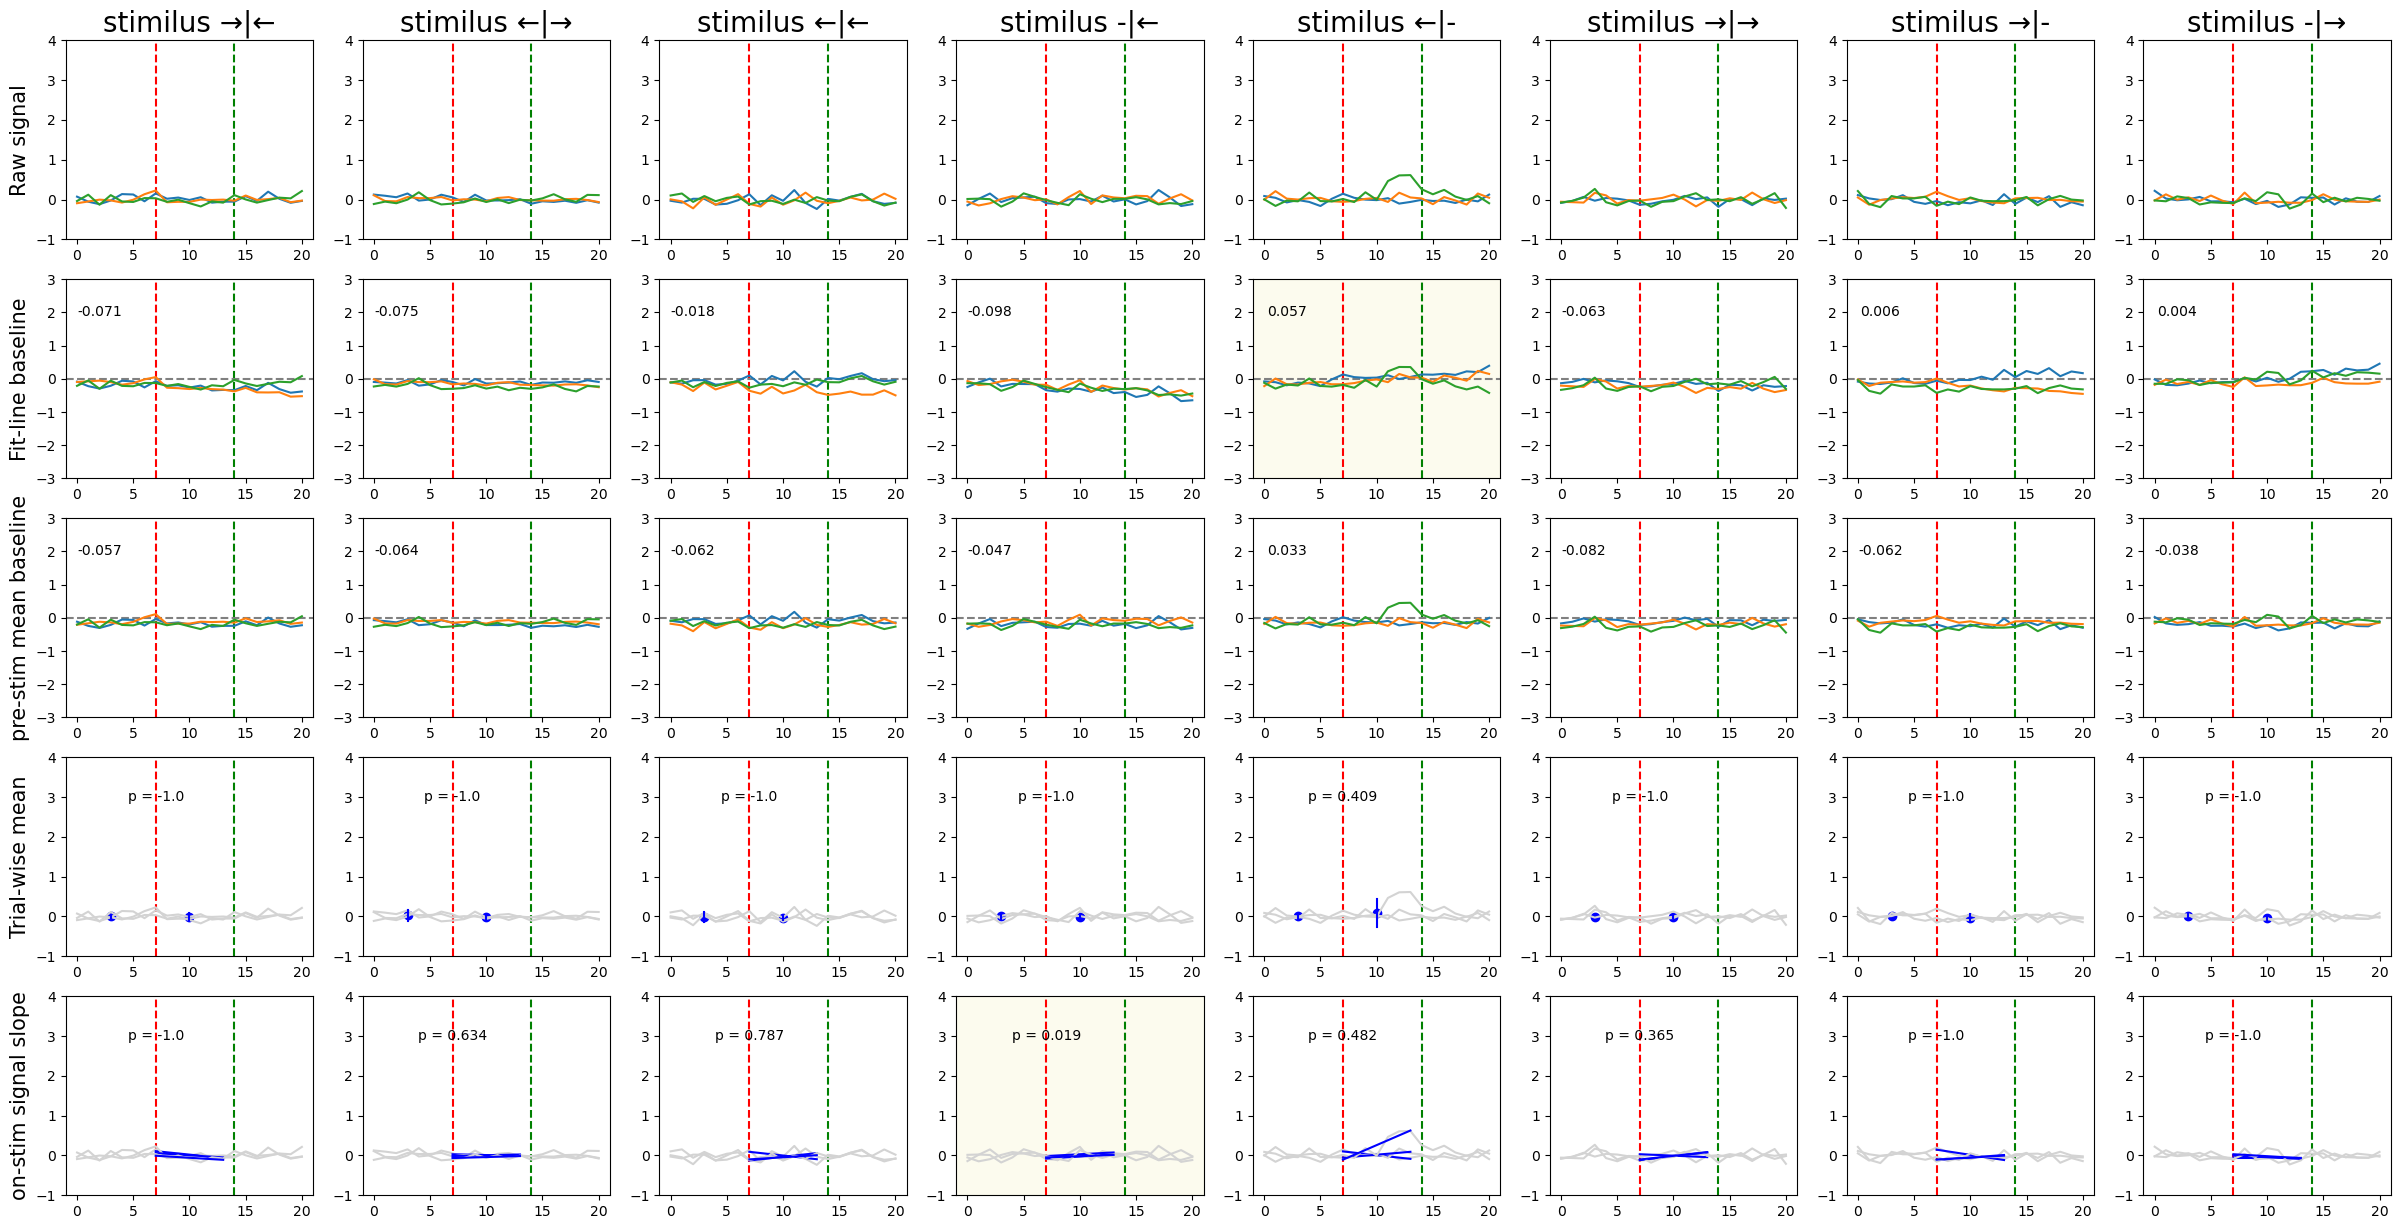

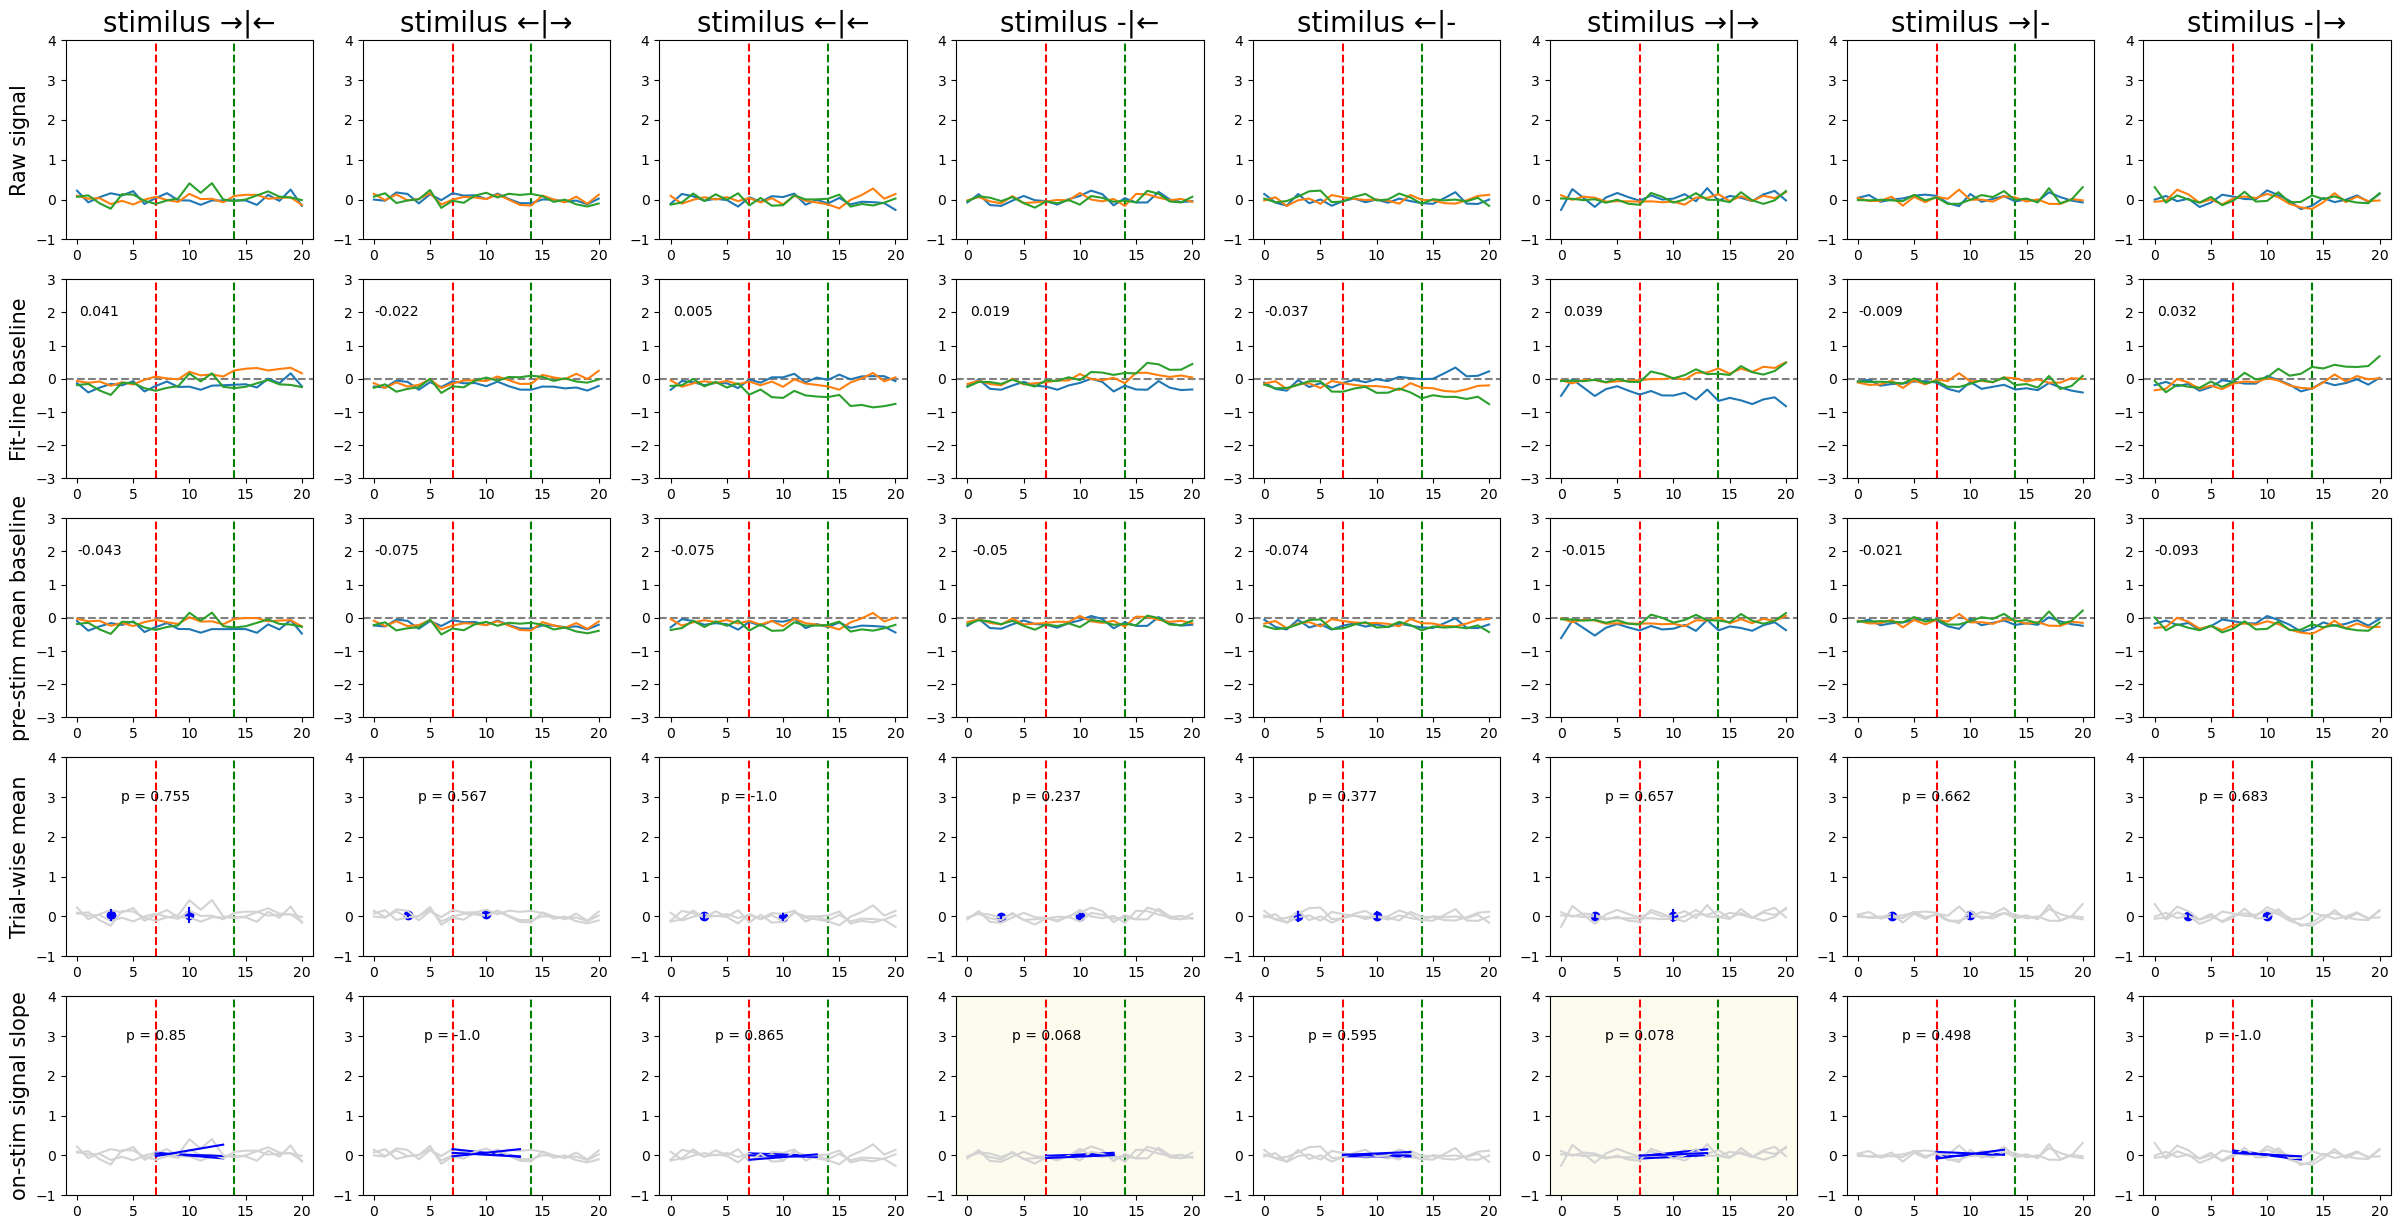

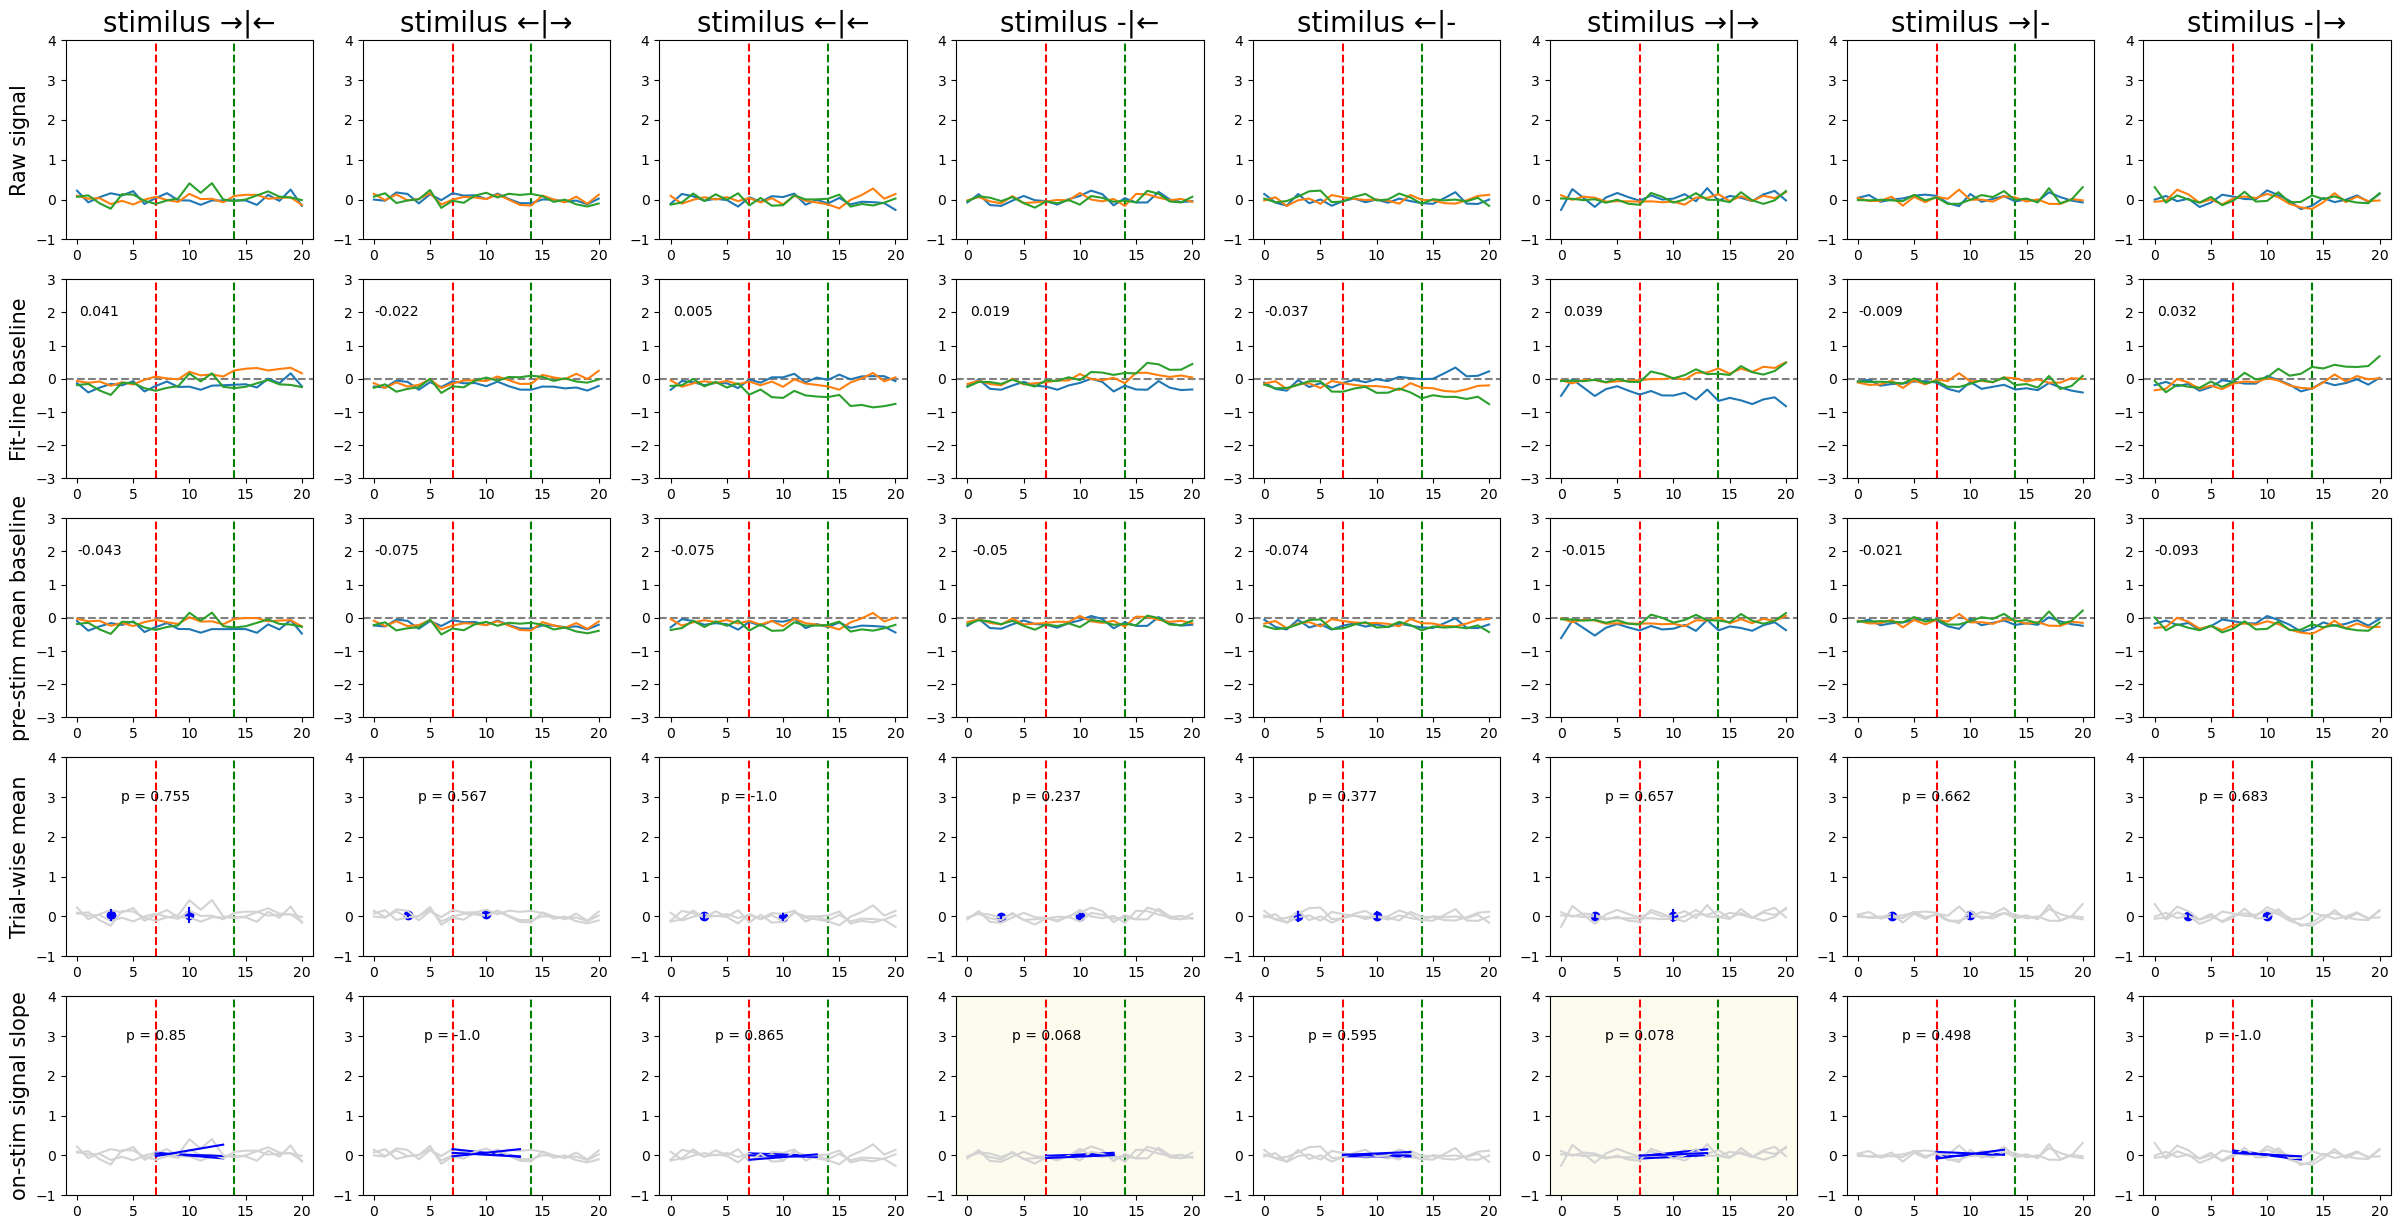

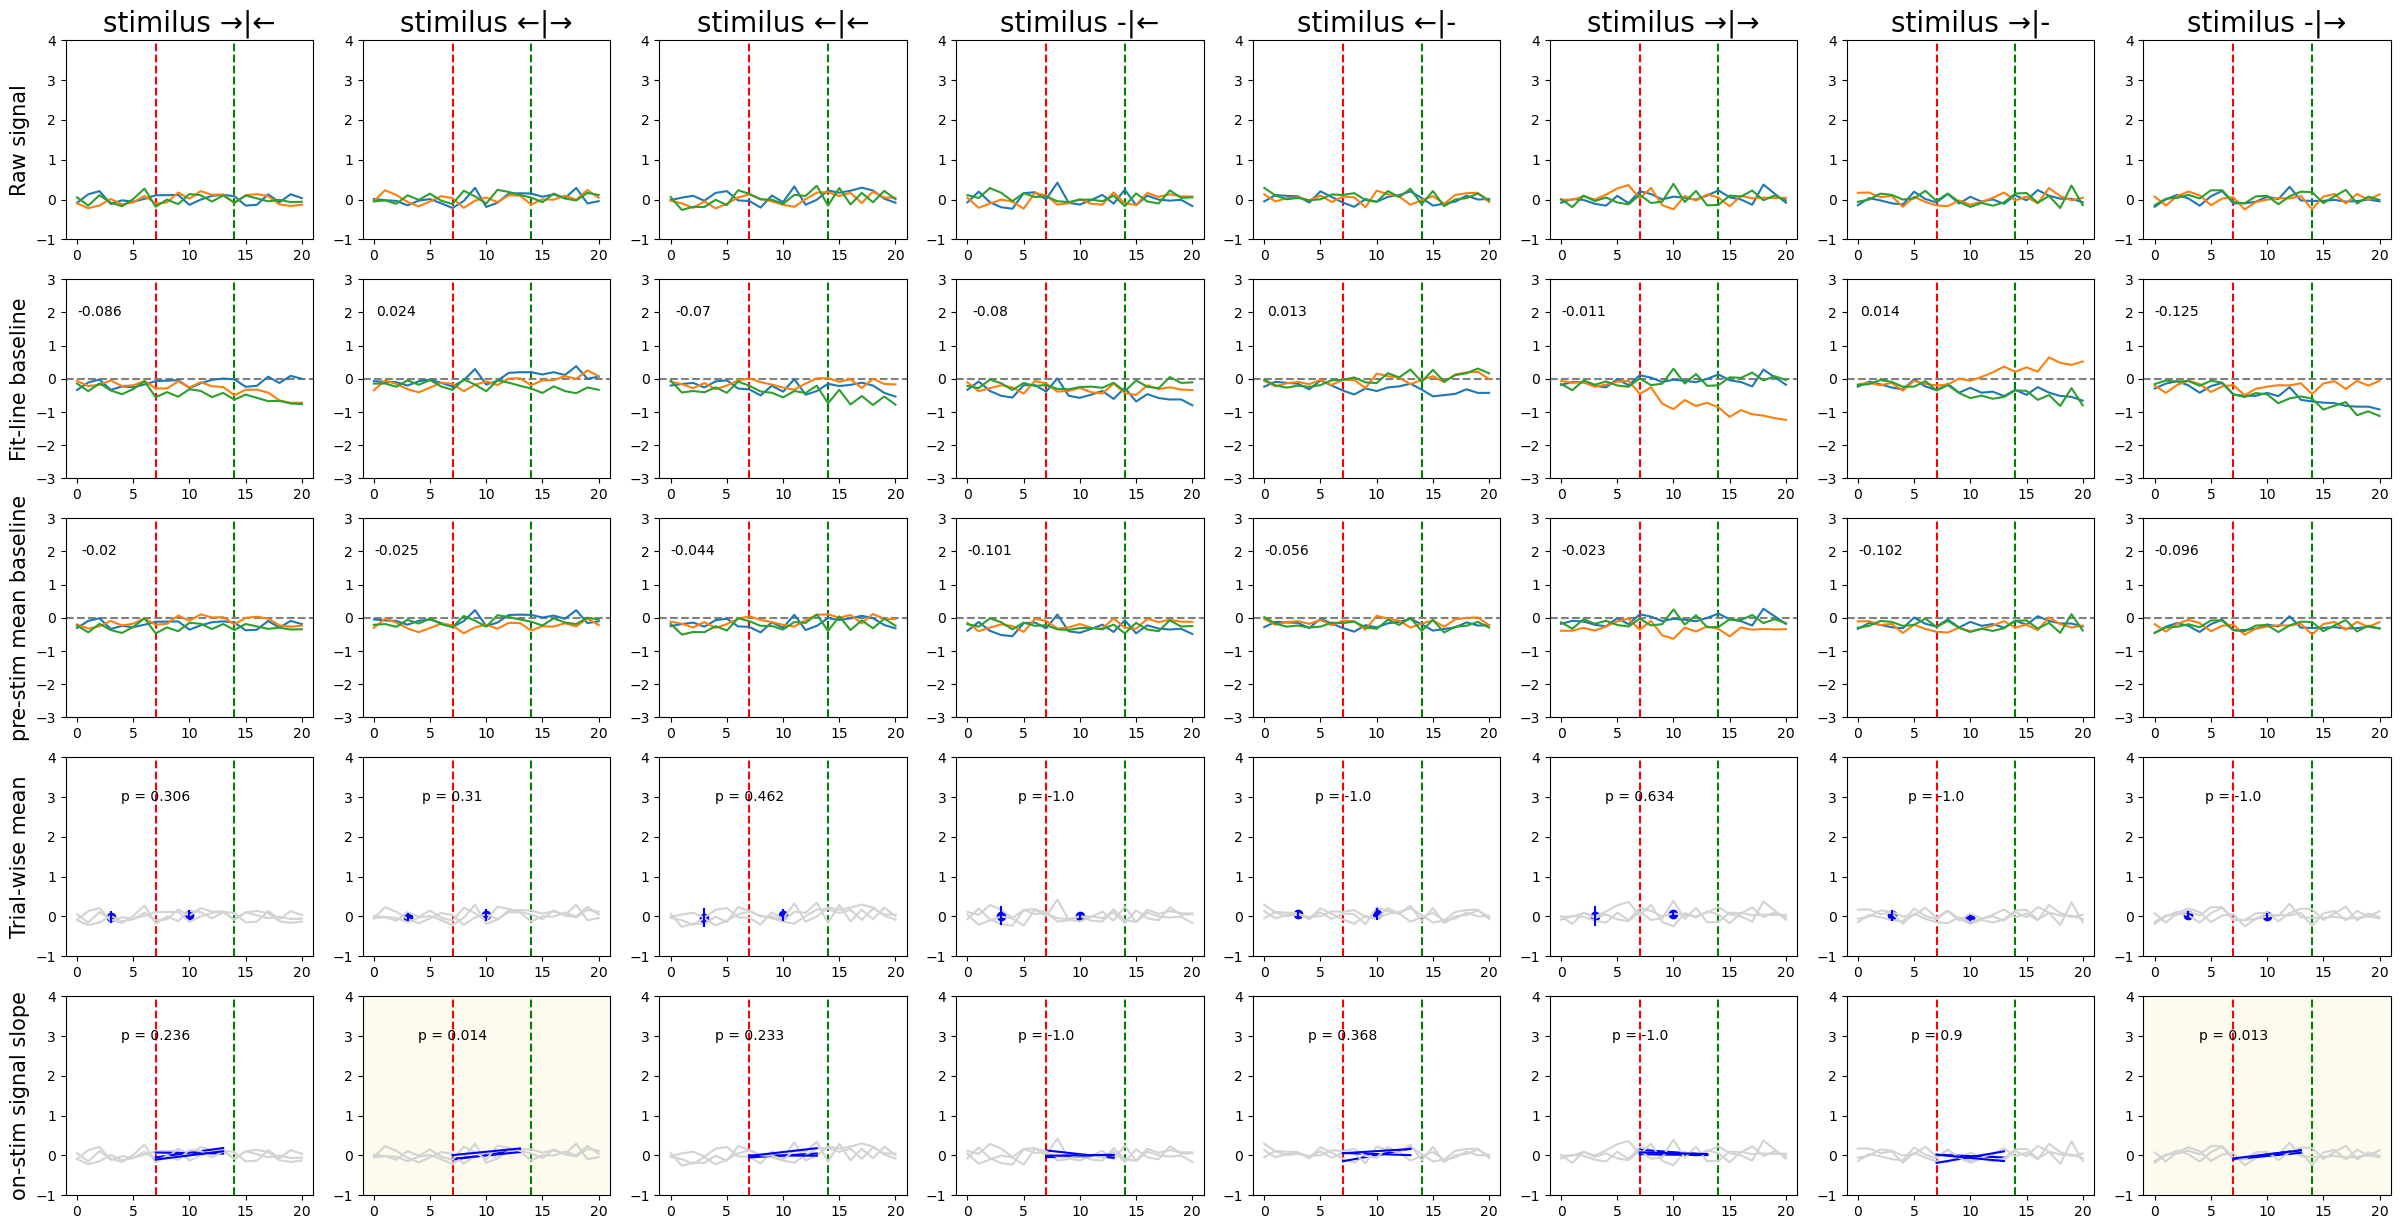

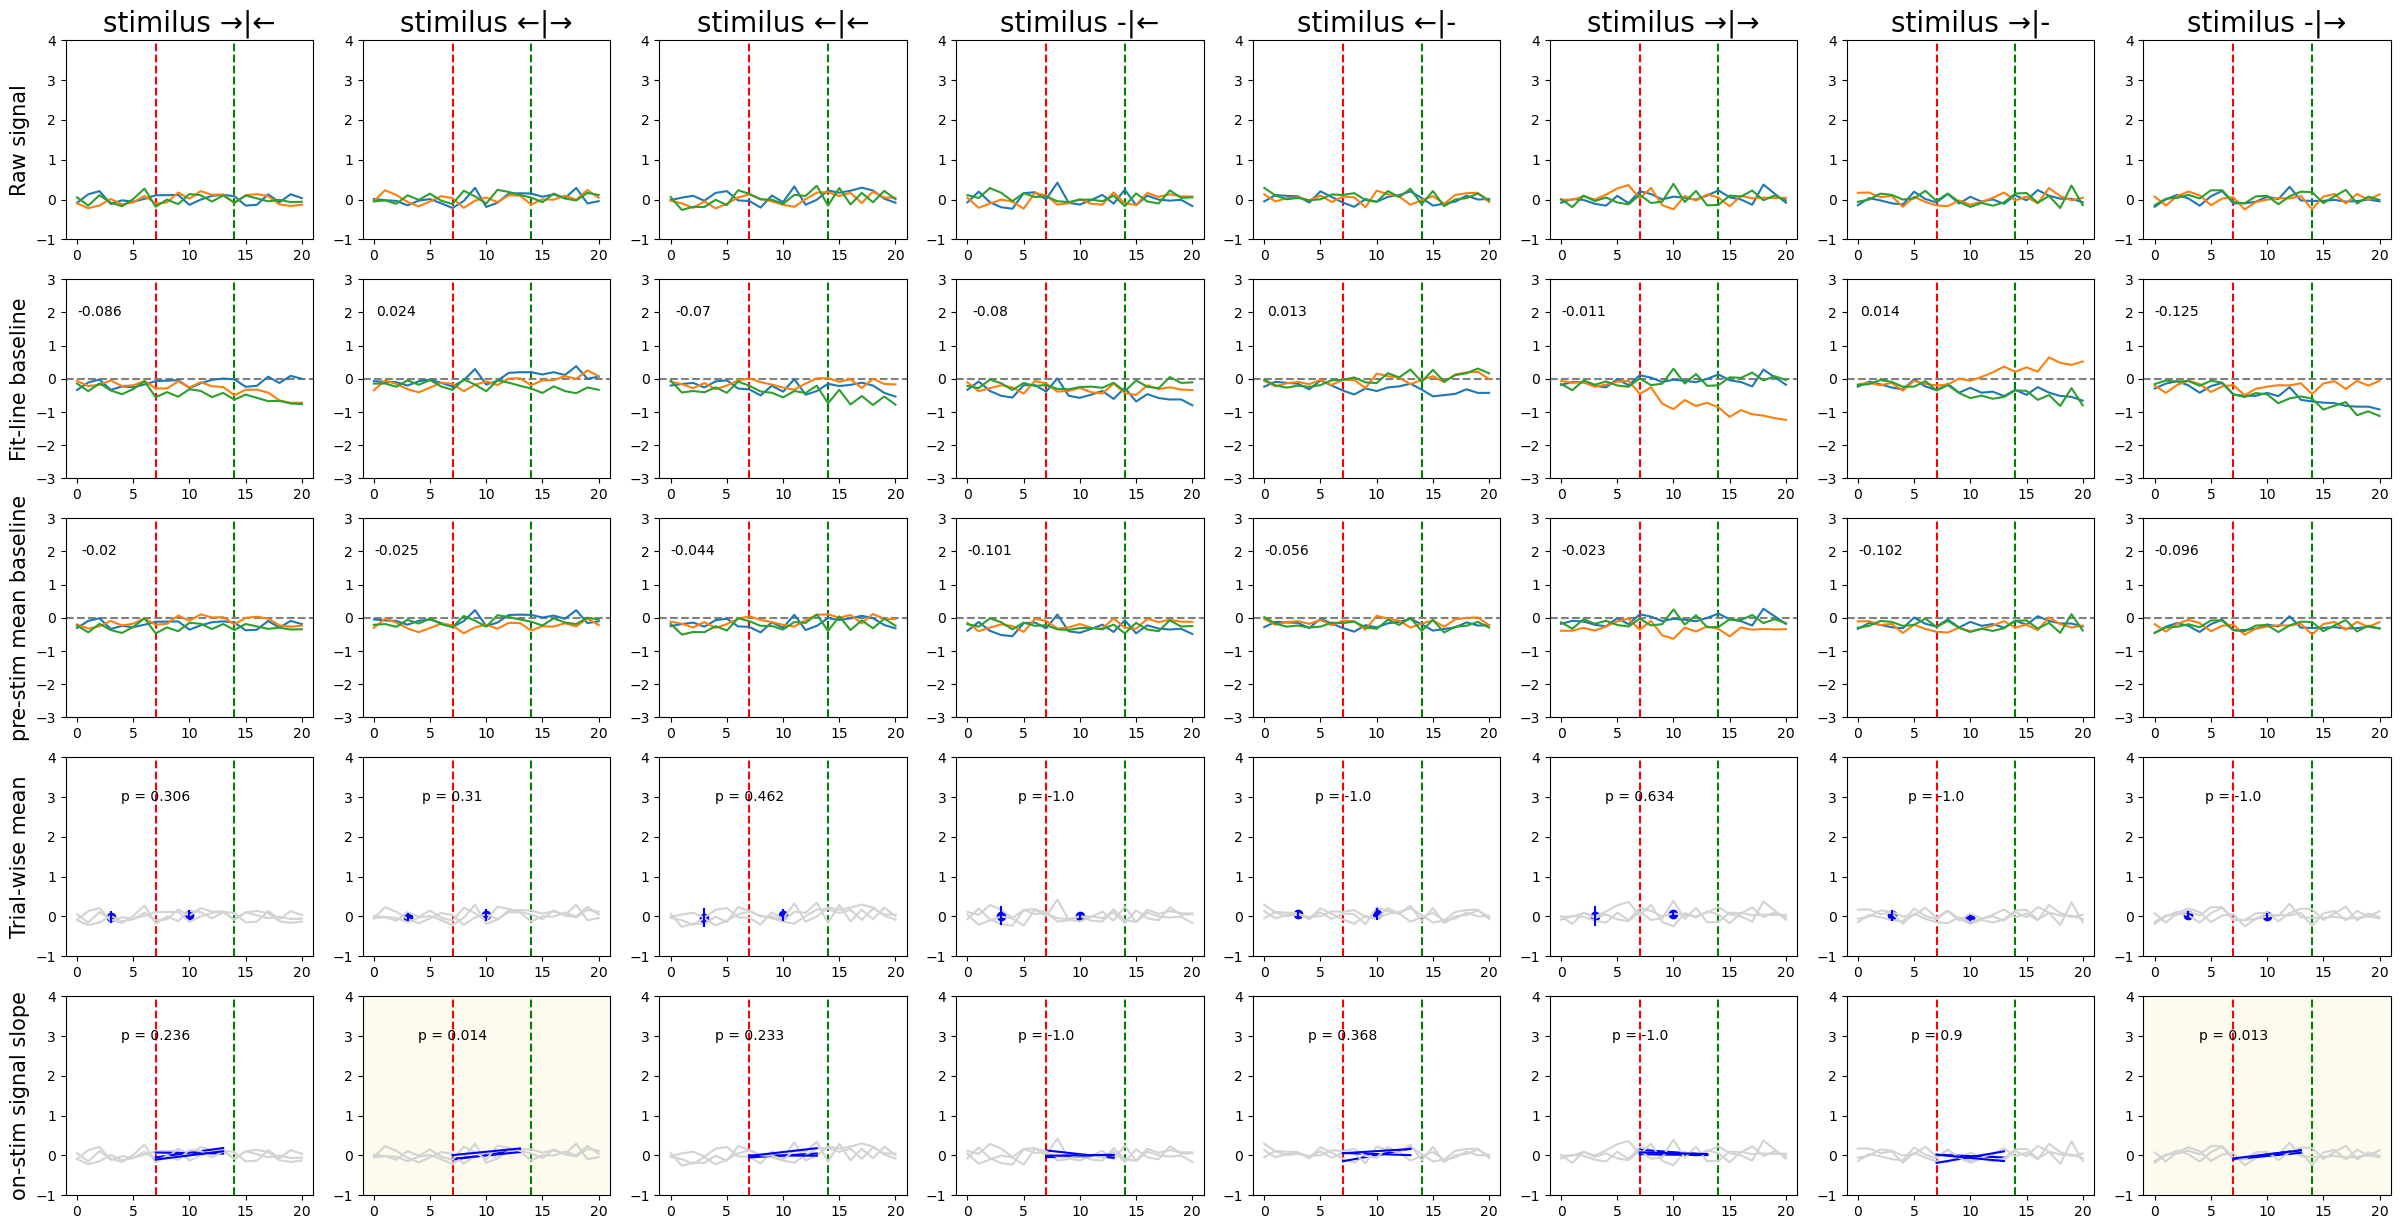

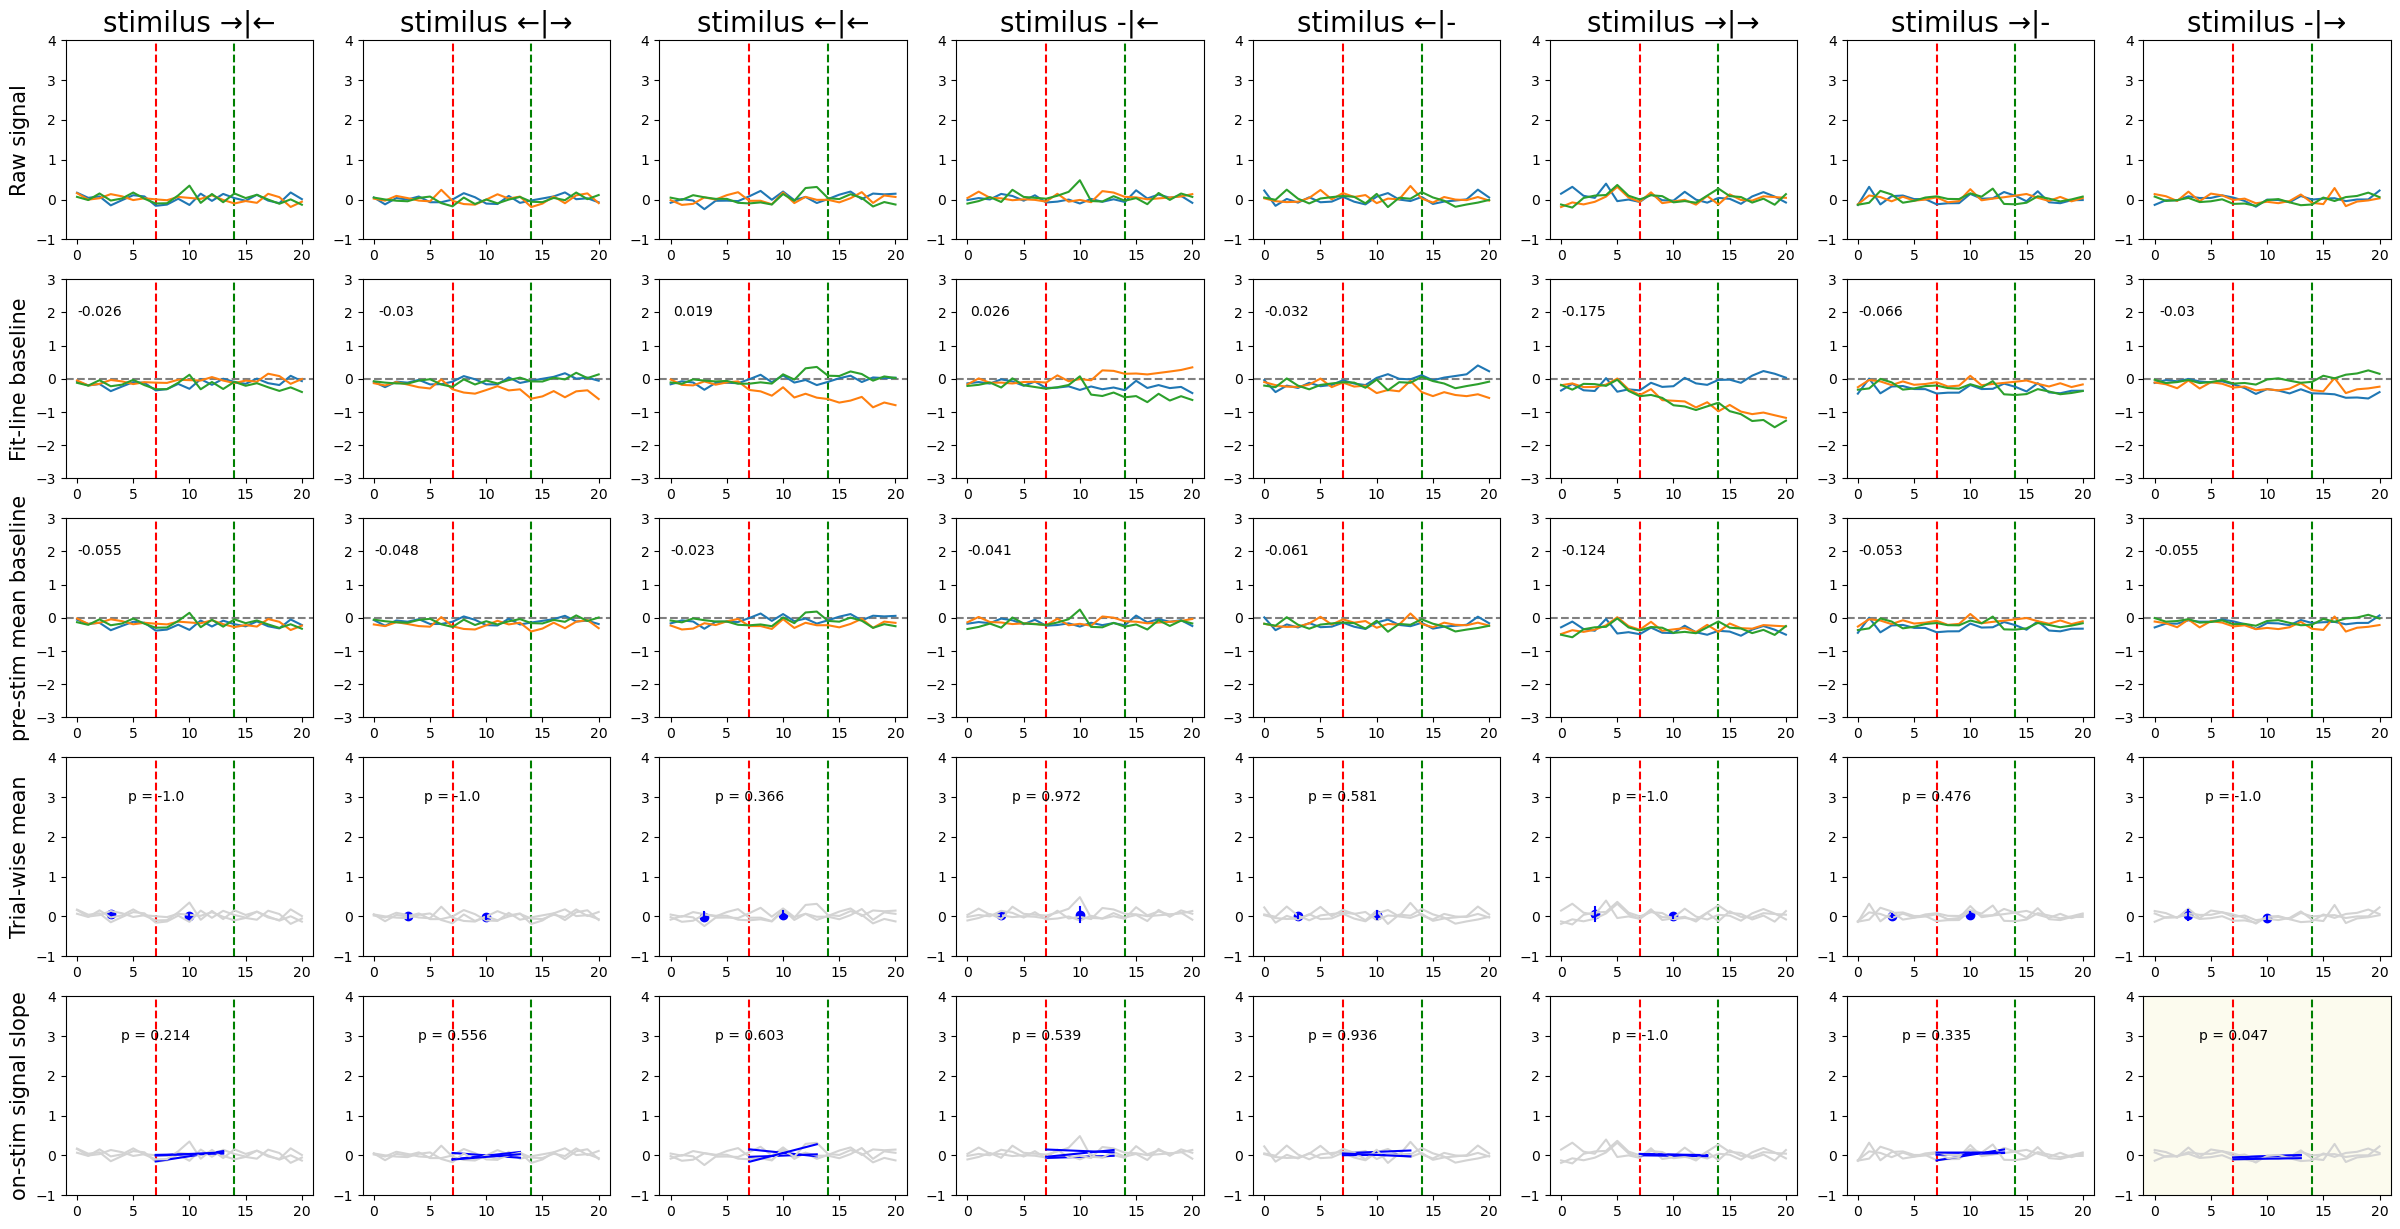

In [41]:
pt_all = all_neuron
import matplotlib.pyplot as plt
stim_list = ['→|←','←|→','←|←','-|←','←|-','→|→','→|-','-|→']
num_neurons = np.shape(pt_all)[0]
# neuron_list = [15, 16,17,22,24,28,56,74,89,110]
for neuron in (slope_index[0])[:10]: #index_responsive[0][10:30]:#num_neurons
    print(neuron)
    rows, cols = 5, 8
    fig,ax = plt.subplots(rows, cols, figsize=(30, 15))
    x = np.linspace(0, 20, num=21)
    x_2 = np.linspace(0, 23, num=14)
    for stim in range(8):
        print(np.shape(pt_all))
        ot_record = pt_all[neuron, :, stim*21 : stim*21+21]
        ax[0, stim].set_ylim(-1, 4)
        ax[0, stim].axvline(x=7, color='r', linestyle='--')
        ax[0, stim].axvline(x=14, color='g', linestyle='--')
        ax[0, stim].set_title(f'stimilus {stim_list[stim]}', fontsize=20)
        ax[0, 0].set_ylabel('Raw signal', fontsize=15)
        print(np.shape(ot_record))
        for trial in range(3):   
            ax[0, stim].plot(x, ot_record[trial], linestyle='-')
        
        ot_fit_line_record = fit_line_max_remains[neuron, :,stim]
        ax[1, stim].text(2, 2, f'{round(fit_line_res_max_avg[neuron, stim], 3)}', horizontalalignment='center', verticalalignment='center')
        if fit_line_barcode[neuron, stim] == 1:
            ax[1, stim].set_facecolor('#FCFBEE')
        ax[1, stim].set_ylim(-3, 3)
        ax[1, stim].axvline(x=7, color='r', linestyle='--')
        ax[1, stim].axvline(x=14, color='g', linestyle='--')
        ax[1, stim].axhline(y=0, color='grey', linestyle='--')
        ax[1, 0].set_ylabel('Fit-line baseline', fontsize=15)
        for trial in range(3):   
            ax[1, stim].plot(x, ot_fit_line_record[trial*21:trial*21+21], linestyle='-')

        ot_fit_avg_record = fit_avg_max_remains[neuron, :, stim]
        ax[2, stim].text(2, 2, f'{round(fit_avg_res_max_avg[neuron, stim], 3)}', horizontalalignment='center', verticalalignment='center')
        if fit_avg_barcode[neuron, stim] == 1:
            ax[2, stim].set_facecolor('#FCFBEE')
        ax[2, stim].set_ylim(-3, 3)
        ax[2, stim].axvline(x=7, color='r', linestyle='--')
        ax[2, stim].axvline(x=14, color='g', linestyle='--')
        ax[2, stim].axhline(y=0, color='grey', linestyle='--')
        ax[2, 0].set_ylabel('pre-stim mean baseline', fontsize=15)
        for trial in range(3):   
            ax[2, stim].plot(x, ot_fit_avg_record[trial*21:trial*21+21], linestyle='-')

        ot_record = pt_all[neuron, :, stim*21 : stim*21+21]
        if (trial_avg_p[neuron, stim] < 0.1) and (trial_avg_p[neuron, stim] > 0):
            ax[3, stim].set_facecolor('#FCFBEE')
        ax[3, stim].set_ylim(-1, 4)
        ax[3, stim].axvline(x=7, color='r', linestyle='--')
        ax[3, stim].axvline(x=14, color='g', linestyle='--')
        for trial in range(3):   
            ax[3, stim].plot(x, ot_record[trial], linestyle='-', color = 'lightgrey')
        ax[3, stim].plot((3,3),(ci_baseline_record[neuron, 0, stim],ci_baseline_record[neuron, 1, stim]),'-',color='blue')
        ax[3, stim].plot((10,10),(ci_on_record[neuron, 0, stim],ci_on_record[neuron, 1, stim]),'-',color='blue')
        ax[3, stim].scatter(3, mean_baseline_record[neuron, stim], color = 'blue')
        ax[3, stim].text(7, 3, f'p = {round(trial_avg_p[neuron, stim], 3)}', horizontalalignment='center', verticalalignment='center')
        ax[3, stim].scatter(10, mean_on_record[neuron, stim], color = 'blue')
        ax[3, 0].set_ylabel('Trial-wise mean', fontsize=15)

        ot_record = pt_all[neuron, :, stim*21 : stim*21+21]
        if (correlate_p[neuron, stim] < 0.1) and (correlate_p[neuron, stim] > 0):
            ax[4, stim].set_facecolor('#FCFBEE')
        ax[4, stim].set_ylim(-1, 4)
        ax[4, stim].axvline(x=7, color='r', linestyle='--')
        ax[4, stim].axvline(x=14, color='g', linestyle='--')
        for trial in range(3):   
            ax[4, stim].plot(x, ot_record[trial], linestyle='-', color = 'lightgrey')
            x_val = np.arange(7, 14, dtype = int)
            y_val = slope_record[neuron, trial, stim] * x_val + intercept_record[neuron, trial, stim]
            ax[4, stim].plot(x_val, y_val, '-', color = 'blue')
        ax[4, stim].text(7, 3, f'p = {round(correlate_p[neuron, stim], 3)}', horizontalalignment='center', verticalalignment='center')
        ax[4, 0].set_ylabel('on-stim signal slope', fontsize=15)
    fig.show()
    #fig.savefig(f'data/selected_neuron_all_plane/plot/pt_ttest_{neuron}.png')

In [ ]:
pt_all = all_neuron
import matplotlib.pyplot as plt
stim_list = ['→|←','←|→','←|←','-|←','←|-','→|→','→|-','-|→']
num_neurons = np.shape(pt_all)[0]
# neuron_list = [15, 16,17,22,24,28,56,74,89,110]
for neuron in max_index: #index_responsive[0][10:30]:#num_neurons
    rows, cols = 5, 8
    fig,ax = plt.subplots(rows, cols, figsize=(30, 15))
    x = np.linspace(0, 20, num=21)
    x_2 = np.linspace(0, 23, num=14)
    for stim in range(8):
        ot_record = pt_all[neuron, :, stim*21 : stim*21+21]
        ax[0, stim].set_ylim(-1, 4)
        ax[0, stim].axvline(x=7, color='r', linestyle='--')
        ax[0, stim].axvline(x=14, color='g', linestyle='--')
        ax[0, stim].set_title(f'stimilus {stim_list[stim]}', fontsize=20)
        ax[0, 0].set_ylabel('Raw signal', fontsize=15)
        for trial in range(3):   
            ax[0, stim].plot(x, ot_record[trial], linestyle='-')
        
        ot_fit_line_record = fit_line_max_remains[neuron, :,stim]
        ax[1, stim].text(2, 2, f'{round(fit_line_res_max_avg[neuron, stim], 3)}', horizontalalignment='center', verticalalignment='center')
        if fit_line_max_barcode[neuron, stim] == 1:
            ax[1, stim].set_facecolor('#FCFBEE')
        ax[1, stim].set_ylim(-3, 3)
        ax[1, stim].axvline(x=7, color='r', linestyle='--')
        ax[1, stim].axvline(x=14, color='g', linestyle='--')
        ax[1, stim].axhline(y=0, color='grey', linestyle='--')
        ax[1, 0].set_ylabel('Fit-line baseline', fontsize=15)
        for trial in range(3):   
            ax[1, stim].plot(x, ot_fit_line_record[trial*21:trial*21+21], linestyle='-')

        ot_fit_avg_record = fit_avg_max_remains[neuron, :, stim]
        ax[2, stim].text(2, 2, f'{round(fit_avg_res_max_avg[neuron, stim], 3)}', horizontalalignment='center', verticalalignment='center')
        if fit_avg_max_barcode[neuron, stim] == 1:
            ax[2, stim].set_facecolor('#FCFBEE')
        ax[2, stim].set_ylim(-3, 3)
        ax[2, stim].axvline(x=7, color='r', linestyle='--')
        ax[2, stim].axvline(x=14, color='g', linestyle='--')
        ax[2, stim].axhline(y=0, color='grey', linestyle='--')
        ax[2, 0].set_ylabel('pre-stim mean baseline', fontsize=15)
        for trial in range(3):   
            ax[2, stim].plot(x, ot_fit_avg_record[trial*21:trial*21+21], linestyle='-')

        ot_record = pt_all[neuron, :, stim*21 : stim*21+21]
        if (trial_avg_max_p[neuron, stim] < 0.05) and (trial_avg_max_p[neuron, stim] > 0):
            ax[3, stim].set_facecolor('#FCFBEE')
        ax[3, stim].set_ylim(-1, 4)
        ax[3, stim].axvline(x=7, color='r', linestyle='--')
        ax[3, stim].axvline(x=14, color='g', linestyle='--')
        for trial in range(3):   
            ax[3, stim].plot(x, ot_record[trial], linestyle='-', color = 'lightgrey')
        ax[3, stim].plot((3,3),(ci_baseline_max_record[neuron, 0, stim],ci_baseline_max_record[neuron, 1, stim]),'-',color='blue')
        ax[3, stim].plot((10,10),(ci_on_max_record[neuron, 0, stim],ci_on_max_record[neuron, 1, stim]),'-',color='blue')
        ax[3, stim].scatter(3, mean_baseline_max_record[neuron, stim], color = 'blue')
        ax[3, stim].text(7, 3, f'p = {round(trial_avg_max_p[neuron, stim], 3)}', horizontalalignment='center', verticalalignment='center')
        ax[3, stim].scatter(10, mean_on_max_record[neuron, stim], color = 'blue')
        ax[3, 0].set_ylabel('Trial-wise mean', fontsize=15)

        ot_record = pt_all[neuron, :, stim*21 : stim*21+21]
        if (correlate_p[neuron, stim] < 0.05) and (correlate_p[neuron, stim] > 0):
            ax[4, stim].set_facecolor('#FCFBEE')
        ax[4, stim].set_ylim(-1, 4)
        ax[4, stim].axvline(x=7, color='r', linestyle='--')
        ax[4, stim].axvline(x=14, color='g', linestyle='--')
        for trial in range(3):   
            ax[4, stim].plot(x, ot_record[trial], linestyle='-', color = 'lightgrey')
            x_val = np.arange(7, 14, dtype = int)
            y_val = slope_record[neuron, trial, stim] * x_val + intercept_record[neuron, trial, stim]
            ax[4, stim].plot(x_val, y_val, '-', color = 'blue')
        ax[4, stim].text(7, 3, f'p = {round(correlate_p[neuron, stim], 3)}', horizontalalignment='center', verticalalignment='center')
        ax[4, 0].set_ylabel('on-stim signal slope', fontsize=15)
    fig.show()
    #fig.savefig(f'data/selected_neuron_all_plane/plot/pt_ttest_{neuron}.png')

In [ ]:
label_barcode = np.loadtxt('data/selected_neuron_all_plane/results.csv', delimiter = ',')
print(np.shape(label_barcode))

In [ ]:
np.save(f'data/selected_neuron_all_plane/all_neurons_slope_record.npy', slope_record)
np.save(f'data/selected_neuron_all_plane/all_neurons_trial_avg_p.npy', trial_avg_p)
np.save(f'data/selected_neuron_all_plane/all_neurons_correlate_p.npy', correlate_p)
np.save(f'data/selected_neuron_all_plane/all_neurons_fit_line_barcode.npy', fit_line_barcode)
np.save(f'data/selected_neuron_all_plane/all_neurons_fit_avg_barcode.npy', fit_avg_barcode)

In [ ]:
np.save(f'data/p{plane_index}/ttest_out/all_neurons_slope_record.npy', slope_record)
np.save(f'data/p{plane_index}/ttest_out/all_neurons_trial_avg_p.npy', trial_avg_p)
np.save(f'data/p{plane_index}/ttest_out/all_neurons_correlate_p.npy', correlate_p)
np.save(f'data/p{plane_index}/ttest_out/all_neurons_fit_line_barcode.npy', fit_line_barcode)
np.save(f'data/p{plane_index}/ttest_out/all_neurons_fit_avg_barcode.npy', fit_avg_barcode)

In [ ]:
max_index = []
for i in range(292):
    for j in range(8):
        if (trial_avg_max_p[i, j] < 0.05 and trial_avg_max_p[i, j] > 0) and (correlate_p[i, j] < 0.05 and correlate_p[i, j] > 0):
            max_index.append(i)

max_index = np.unique(np.array(max_index))
print(len(max_index))

In [ ]:
pt_all = all_neuron
import matplotlib.pyplot as plt
stim_list = ['→|←','←|→','←|←','-|←','←|-','→|→','→|-','-|→']
num_neurons = np.shape(pt_all)[0]
# neuron_list = [15, 16,17,22,24,28,56,74,89,110]
for neuron in max_index: #index_responsive[0][10:30]:#num_neurons
    rows, cols = 5, 8
    fig,ax = plt.subplots(rows, cols, figsize=(30, 15))
    x = np.linspace(0, 20, num=21)
    x_2 = np.linspace(0, 23, num=14)
    for stim in range(8):
        ot_record = pt_all[neuron, :, stim*21 : stim*21+21]
        ax[0, stim].set_ylim(-1, 4)
        ax[0, stim].axvline(x=7, color='r', linestyle='--')
        ax[0, stim].axvline(x=14, color='g', linestyle='--')
        ax[0, stim].set_title(f'stimilus {stim_list[stim]}', fontsize=20)
        ax[0, 0].set_ylabel('Raw signal', fontsize=15)
        for trial in range(3):   
            ax[0, stim].plot(x, ot_record[trial], linestyle='-')
        
        ot_fit_line_record = fit_line_remains[neuron, :,stim]
        ax[1, stim].text(2, 2, f'{round(fit_line_res_avg[neuron, stim], 3)}', horizontalalignment='center', verticalalignment='center')
        if fit_line_barcode[neuron, stim] == 1:
            ax[1, stim].set_facecolor('#FCFBEE')
        ax[1, stim].set_ylim(-3, 3)
        ax[1, stim].axvline(x=7, color='r', linestyle='--')
        ax[1, stim].axvline(x=14, color='g', linestyle='--')
        ax[1, stim].axhline(y=0, color='grey', linestyle='--')
        ax[1, 0].set_ylabel('Fit-line baseline', fontsize=15)
        for trial in range(3):   
            ax[1, stim].plot(x, ot_fit_line_record[trial*21:trial*21+21], linestyle='-')

        ot_fit_avg_record = fit_avg_remains[neuron, :, stim]
        ax[2, stim].text(2, 2, f'{round(fit_avg_res_avg[neuron, stim], 3)}', horizontalalignment='center', verticalalignment='center')
        if fit_avg_barcode[neuron, stim] == 1:
            ax[2, stim].set_facecolor('#FCFBEE')
        ax[2, stim].set_ylim(-3, 3)
        ax[2, stim].axvline(x=7, color='r', linestyle='--')
        ax[2, stim].axvline(x=14, color='g', linestyle='--')
        ax[2, stim].axhline(y=0, color='grey', linestyle='--')
        ax[2, 0].set_ylabel('pre-stim mean baseline', fontsize=15)
        for trial in range(3):   
            ax[2, stim].plot(x, ot_fit_avg_record[trial*21:trial*21+21], linestyle='-')

        ot_record = pt_all[neuron, :, stim*21 : stim*21+21]
        if (trial_avg_max_p[neuron, stim] < 0.05) and (trial_avg_max_p[neuron, stim] > 0):
            ax[3, stim].set_facecolor('#FCFBEE')
        ax[3, stim].set_ylim(-1, 4)
        ax[3, stim].axvline(x=7, color='r', linestyle='--')
        ax[3, stim].axvline(x=14, color='g', linestyle='--')
        for trial in range(3):   
            ax[3, stim].plot(x, ot_record[trial], linestyle='-', color = 'lightgrey')
        ax[3, stim].plot((3,3),(ci_baseline_record[neuron, 0, stim],ci_baseline_record[neuron, 1, stim]),'-',color='blue')
        ax[3, stim].plot((10,10),(ci_on_record[neuron, 0, stim],ci_on_record[neuron, 1, stim]),'-',color='blue')
        ax[3, stim].scatter(3, mean_baseline_record[neuron, stim], color = 'blue')
        ax[3, stim].text(7, 3, f'p = {round(trial_avg_max_p[neuron, stim], 3)}', horizontalalignment='center', verticalalignment='center')
        ax[3, stim].scatter(10, mean_on_max_record[neuron, stim], color = 'blue')
        ax[3, 0].set_ylabel('Trial-wise mean', fontsize=15)

        ot_record = pt_all[neuron, :, stim*21 : stim*21+21]
        if (correlate_p[neuron, stim] < 0.05) and (correlate_p[neuron, stim] > 0):
            ax[4, stim].set_facecolor('#FCFBEE')
        ax[4, stim].set_ylim(-1, 4)
        ax[4, stim].axvline(x=7, color='r', linestyle='--')
        ax[4, stim].axvline(x=14, color='g', linestyle='--')
        for trial in range(3):   
            ax[4, stim].plot(x, ot_record[trial], linestyle='-', color = 'lightgrey')
            x_val = np.arange(7, 14, dtype = int)
            y_val = slope_record[neuron, trial, stim] * x_val + intercept_record[neuron, trial, stim]
            ax[4, stim].plot(x_val, y_val, '-', color = 'blue')
        ax[4, stim].text(7, 3, f'p = {round(correlate_p[neuron, stim], 3)}', horizontalalignment='center', verticalalignment='center')
        ax[4, 0].set_ylabel('on-stim signal slope', fontsize=15)
    fig.show()
    fig.savefig(f'data/selected_neuron_all_plane/plot/pt_ttest_{neuron}.png')

In [ ]:
pt_all = all_neuron
import matplotlib.pyplot as plt
stim_list = ['→|←','←|→','←|←','-|←','←|-','→|→','→|-','-|→']
num_neurons = np.shape(pt_all)[0]
# neuron_list = [15, 16,17,22,24,28,56,74,89,110]
for neuron in max_index: #index_responsive[0][10:30]:#num_neurons
    rows, cols = 5, 8
    fig,ax = plt.subplots(rows, cols, figsize=(30, 15))
    x = np.linspace(0, 20, num=21)
    x_2 = np.linspace(0, 23, num=14)
    for stim in range(8):
        ot_record = pt_all[neuron, :, stim*21 : stim*21+21]
        ax[0, stim].set_ylim(-1, 4)
        ax[0, stim].axvline(x=7, color='r', linestyle='--')
        ax[0, stim].axvline(x=14, color='g', linestyle='--')
        ax[0, stim].set_title(f'stimilus {stim_list[stim]}', fontsize=20)
        ax[0, 0].set_ylabel('Raw signal', fontsize=15)
        for trial in range(3):   
            ax[0, stim].plot(x, ot_record[trial], linestyle='-')
        
        ot_fit_line_record = fit_line_max_remains[neuron, :,stim]
        ax[1, stim].text(2, 2, f'{round(fit_line_res_max_avg[neuron, stim], 3)}', horizontalalignment='center', verticalalignment='center')
        if fit_line_max_barcode[neuron, stim] == 1:
            ax[1, stim].set_facecolor('#FCFBEE')
        ax[1, stim].set_ylim(-3, 3)
        ax[1, stim].axvline(x=7, color='r', linestyle='--')
        ax[1, stim].axvline(x=14, color='g', linestyle='--')
        ax[1, stim].axhline(y=0, color='grey', linestyle='--')
        ax[1, 0].set_ylabel('Fit-line baseline', fontsize=15)
        for trial in range(3):   
            ax[1, stim].plot(x, ot_fit_line_record[trial*21:trial*21+21], linestyle='-')

        ot_fit_avg_record = fit_avg_max_remains[neuron, :, stim]
        ax[2, stim].text(2, 2, f'{round(fit_avg_res_max_avg[neuron, stim], 3)}', horizontalalignment='center', verticalalignment='center')
        if fit_avg_max_barcode[neuron, stim] == 1:
            ax[2, stim].set_facecolor('#FCFBEE')
        ax[2, stim].set_ylim(-3, 3)
        ax[2, stim].axvline(x=7, color='r', linestyle='--')
        ax[2, stim].axvline(x=14, color='g', linestyle='--')
        ax[2, stim].axhline(y=0, color='grey', linestyle='--')
        ax[2, 0].set_ylabel('pre-stim mean baseline', fontsize=15)
        for trial in range(3):   
            ax[2, stim].plot(x, ot_fit_avg_record[trial*21:trial*21+21], linestyle='-')

        ot_record = pt_all[neuron, :, stim*21 : stim*21+21]
        if (trial_avg_max_p[neuron, stim] < 0.05) and (trial_avg_max_p[neuron, stim] > 0):
            ax[3, stim].set_facecolor('#FCFBEE')
        ax[3, stim].set_ylim(-1, 4)
        ax[3, stim].axvline(x=7, color='r', linestyle='--')
        ax[3, stim].axvline(x=14, color='g', linestyle='--')
        for trial in range(3):   
            ax[3, stim].plot(x, ot_record[trial], linestyle='-', color = 'lightgrey')
        ax[3, stim].plot((3,3),(ci_baseline_max_record[neuron, 0, stim],ci_baseline_max_record[neuron, 1, stim]),'-',color='blue')
        ax[3, stim].plot((10,10),(ci_on_max_record[neuron, 0, stim],ci_on_max_record[neuron, 1, stim]),'-',color='blue')
        ax[3, stim].scatter(3, mean_baseline_max_record[neuron, stim], color = 'blue')
        ax[3, stim].text(7, 3, f'p = {round(trial_avg_max_p[neuron, stim], 3)}', horizontalalignment='center', verticalalignment='center')
        ax[3, stim].scatter(10, mean_on_max_record[neuron, stim], color = 'blue')
        ax[3, 0].set_ylabel('Trial-wise mean', fontsize=15)

        ot_record = pt_all[neuron, :, stim*21 : stim*21+21]
        if (correlate_p[neuron, stim] < 0.05) and (correlate_p[neuron, stim] > 0):
            ax[4, stim].set_facecolor('#FCFBEE')
        ax[4, stim].set_ylim(-1, 4)
        ax[4, stim].axvline(x=7, color='r', linestyle='--')
        ax[4, stim].axvline(x=14, color='g', linestyle='--')
        for trial in range(3):   
            ax[4, stim].plot(x, ot_record[trial], linestyle='-', color = 'lightgrey')
            x_val = np.arange(7, 14, dtype = int)
            y_val = slope_record[neuron, trial, stim] * x_val + intercept_record[neuron, trial, stim]
            ax[4, stim].plot(x_val, y_val, '-', color = 'blue')
        ax[4, stim].text(7, 3, f'p = {round(correlate_p[neuron, stim], 3)}', horizontalalignment='center', verticalalignment='center')
        ax[4, 0].set_ylabel('on-stim signal slope', fontsize=15)
    fig.show()
    #fig.savefig(f'data/selected_neuron_all_plane/plot/pt_ttest_{neuron}.png')

### --------------------

In [ ]:
index_responsive = np.where(barcode[:,0] > 0)
print(index_responsive)

In [ ]:
index_responsive = np.where(np.sum(barcode, axis = 1) > 0)
motion_responsive_pt = pt_all[index_responsive]
motion_responsive_est_avg = res_avg[index_responsive]
motion_responsive_barcode = barcode[index_responsive]

In [ ]:
print(np.shape(motion_responsive_pt))

In [ ]:
index_right_left = np.where(barcode[:, 0] > 0)
index_left_right = np.where(barcode[:, 1] > 0)
index_left_left = np.where(barcode[:, 2] > 0)
index_x_left = np.where(barcode[:, 3] > 0)
index_left_x = np.where(barcode[:, 4] > 0)
index_right_right = np.where(barcode[:, 5] > 0)
index_right_x = np.where(barcode[:, 6] > 0)
index_x_right = np.where(barcode[:, 7] > 0)


In [ ]:
t_stats = np.array(t_stats).T
p_values = np.array(p_values).T
print(np.shape(p_values))

In [ ]:
ot_dict = {}
ot_dict['iwd'] = {}
ot_dict['owd'] = {}
ot_dict['left'] = {}
ot_dict['m_left'] = {}
ot_dict['l_left'] = {}
ot_dict['right'] = {}
ot_dict['m_right'] = {}
ot_dict['l_right'] = {}
count = 0
for item in ot_dict.keys():
    index = np.where(barcode[:, count] > 0)
    print(index)
    (ot_dict[item])['index'] = index
    (ot_dict[item])['ests'] = pt_all[index]
    (ot_dict[item])['ests_avg'] = res_avg[index]
    (ot_dict[item])['barcode'] = barcode[index]
    count += 1
print(ot_dict)

In [ ]:
np.shape((ot_dict[item])['ests'])

In [ ]:
import matplotlib.pyplot as plt
num_neurons = np.shape(pt_all)[0]
for count in range(3):
    rows, cols = 100, 8
    fig,ax = plt.subplots(rows, cols, figsize=(30, 300))
    x = np.linspace(0, 20, num=21)
    for neuron in range(100*count, min(100*(count + 1), num_neuron)):
        for stim in range(cols):
            ax[neuron, stim].text(15, 3, f'{round(p_values[neuron, stim], 3)}', horizontalalignment='center', verticalalignment='center')
            ot_record = pt_all[neuron, :, stim*21 : stim*21+21]
            ax[neuron, stim].set_ylim(-1, 4)
            ax[neuron, stim].axvline(x=7, color='r', linestyle='--')
            ax[neuron, stim].axvline(x=14, color='g', linestyle='--')
            for trial in range(3):   
                ax[neuron, stim].plot(x, ot_record[trial], linestyle='-')
    fig.show()
    fig.savefig(f'pt_ttest_{count}.png')

In [ ]:
import matplotlib.pyplot as plt
count = 0
for item in ot_dict.keys():
    print(item)
    num_neuron = np.shape(ot_dict[item]['ests'])[0]
    print(np.shape(ot_dict[item]['ests']))
    rows, cols = num_neuron, 8
    fig,ax = plt.subplots(rows, cols, figsize=(30, 3*num_neuron))
    x = np.linspace(0, 20, num=21)
    barcode = (ot_dict[item])['barcode']
    ests_avg = (ot_dict[item])['ests_avg']
    for neuron in range(num_neuron):
        for stim in range(cols):
            ax[neuron, stim].text(2, 3, f'{round(ests_avg[neuron, stim], 3)}', horizontalalignment='center', verticalalignment='center')
            if barcode[neuron, stim] == 1:
                ax[neuron, stim].set_facecolor('#FCFBEE')
            ot_record = (ot_dict[item]['ests'])[neuron, :, stim*21 : stim*21+21]
            for trial in range(3):   
                ax[neuron, stim].plot(x, ot_record[trial], linestyle='-')
                ax[neuron, stim].set_ylim(-1, 4)
            ax[neuron, stim].axvline(x=7, color='r', linestyle='--')
            ax[neuron, stim].axvline(x=14, color='g', linestyle='--')
    #fig.show()
    fig.savefig(f'pt_fitline_{item}.png')
    count += 1

In [ ]:
item = 'iwd'
print(item)
num_neuron = np.shape(ot_dict[item]['ests'])[0]
print(np.shape(ot_dict[item]['ests']))
rows, cols = num_neuron, 8
fig,ax = plt.subplots(rows, cols, figsize=(30, 3*num_neuron))
x = np.linspace(0, 20, num=21)
barcode = (ot_dict[item])['barcode']
ests_avg = (ot_dict[item])['ests_avg']
for neuron in range(num_neuron):
    for stim in range(cols):
        ax[neuron, stim].text(2, 3, f'{round(ests_avg[neuron, stim], 3)}', horizontalalignment='center', verticalalignment='center')
        ax[neuron, stim].text(15, 3, f'{round(ests_avg[neuron, stim], 3)}', horizontalalignment='center', verticalalignment='center')
        if barcode[neuron, stim] == 1:
            ax[neuron, stim].set_facecolor('#FCFBEE')
        ot_record = (ot_dict[item]['ests'])[neuron, :, stim*21 : stim*21+21]
        for trial in range(3):   
            ax[neuron, stim].plot(x, ot_record[trial], linestyle='-')
            ax[neuron, stim].set_ylim(-1, 4)
            ax[neuron, stim].axvline(x=7, color='r', linestyle='--')
#fig.show()
fig.savefig(f'pt_fitline_{item}.png')
count += 1

In [ ]:
print(get[0])